In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
import time
import ctypes
import os

MAX_DIMENSIONS = 2
MAX_ITER = 100
times = []

TESTS_AMOUNT = 10
times_py = []

# Реализация на Python с использованием Numba

In [2]:
@jit(nopython=True)
def de_optimizer(objective_function, bounds, pop_size=50, max_iter=MAX_ITER, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

In [3]:
@jit(nopython=True)
def rand_1_bin(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

In [4]:
# Add a performance function to calculate and return the time taken for optimization
def performance_function(func, *args, **kwargs):
    start_time = time.perf_counter()
    result = func(*args, **kwargs)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
    return result, elapsed_time

In [5]:
def plot_performance(performance):
    plt.plot(performance)
    plt.xlabel("Iterations")
    plt.ylabel("Best score")
    plt.show()

In [6]:
def draw_distribution_graphic(best_values, tests_number, function_name):
    x = np.array([i for i in range(1, tests_number + 1)])
    plt.title("Distribution of " + function_name)
    plt.xlabel("Test number")
    plt.ylabel("Best found value")
    plt.scatter(x, best_values, c="blue")
    average = np.average(best_values)
    dispersion = np.sqrt(np.var(best_values))
    average_list = [average for i in range(1, tests_number + 1)]
    plt.plot(x, average_list, c="red")
    plt.fill_between(x, average_list - dispersion, average_list + dispersion, color="red", alpha=0.2)
    plt.show()

# Функции для тестирования

In [7]:
@jit(nopython=True)
def rosenbrock_function(x):
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
#1 Best solution: [1.00000499 1.00000984], Best score: 0.00000, Time taken: 5.86372 seconds


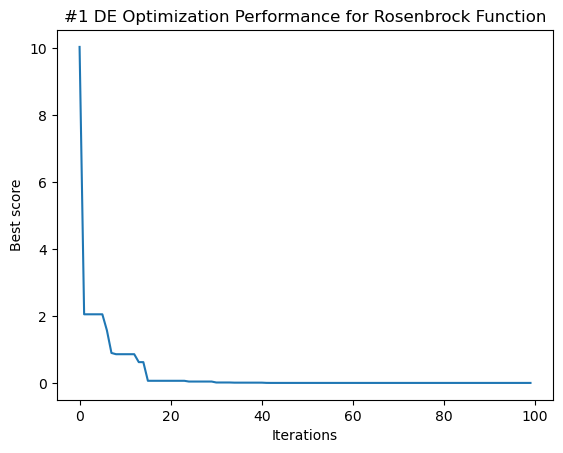

#2 Best solution: [0.99999986 0.99999974], Best score: 0.00000, Time taken: 0.00940 seconds


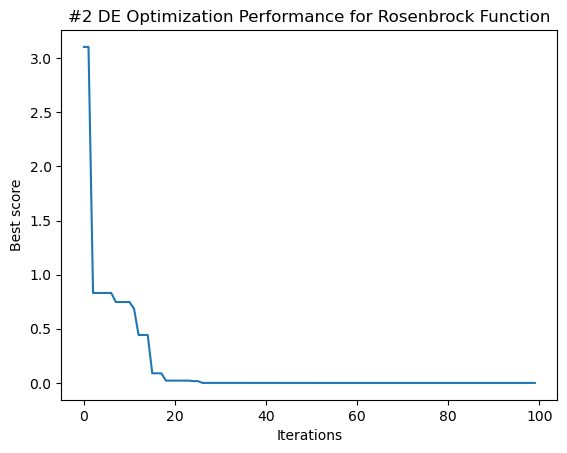

#3 Best solution: [1.00000421 1.00000812], Best score: 0.00000, Time taken: 0.01784 seconds


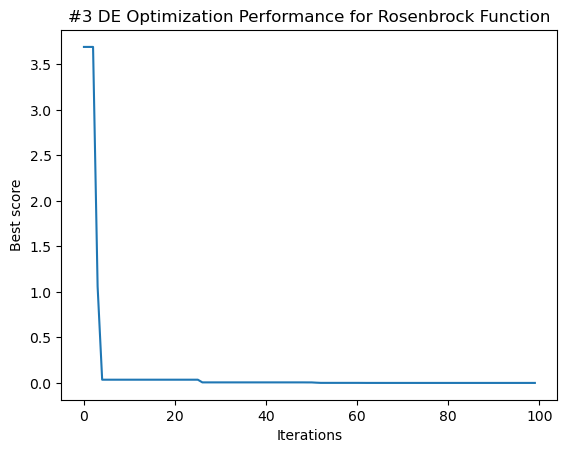

#4 Best solution: [0.99999687 0.99999398], Best score: 0.00000, Time taken: 0.02257 seconds


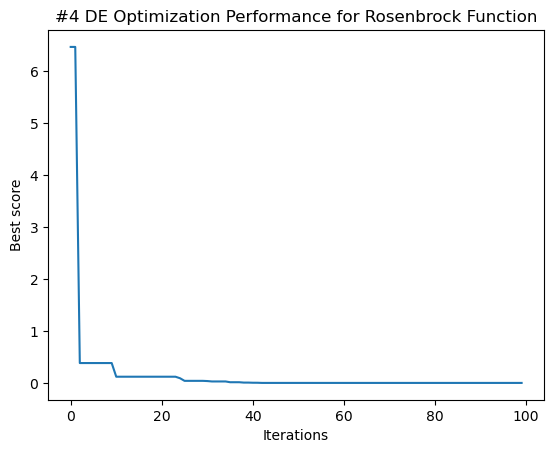

#5 Best solution: [0.99999922 0.9999985 ], Best score: 0.00000, Time taken: 0.00774 seconds


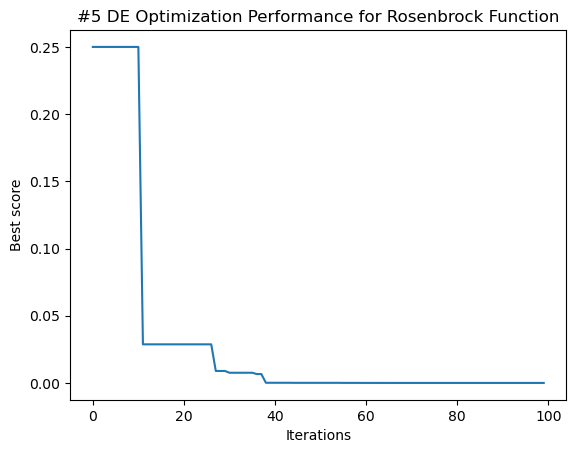

#6 Best solution: [0.99999922 0.9999985 ], Best score: 0.00000, Time taken: 0.01009 seconds


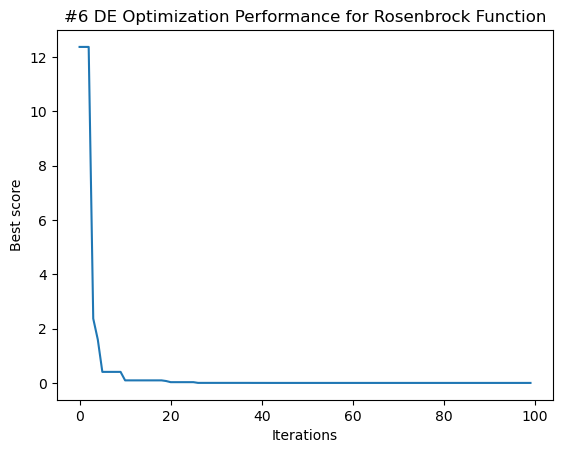

#7 Best solution: [1.00000062 1.00000138], Best score: 0.00000, Time taken: 0.00720 seconds


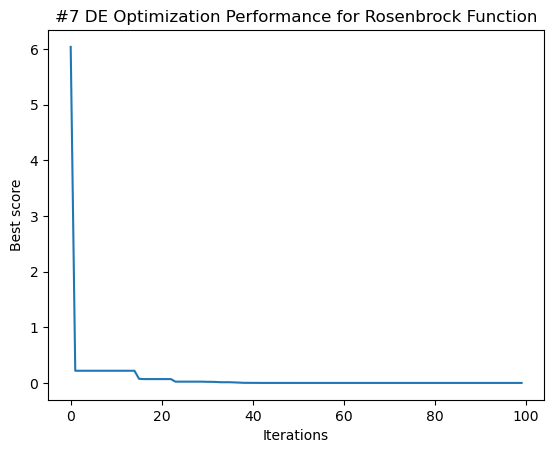

#8 Best solution: [1.00000014 1.00000041], Best score: 0.00000, Time taken: 0.01622 seconds


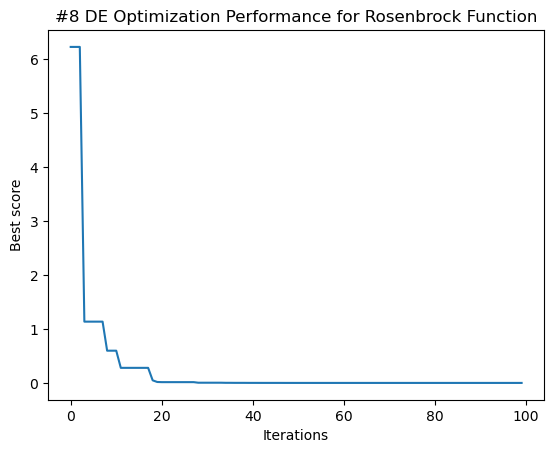

#9 Best solution: [0.99996848 0.9999452 ], Best score: 0.00000, Time taken: 0.00859 seconds


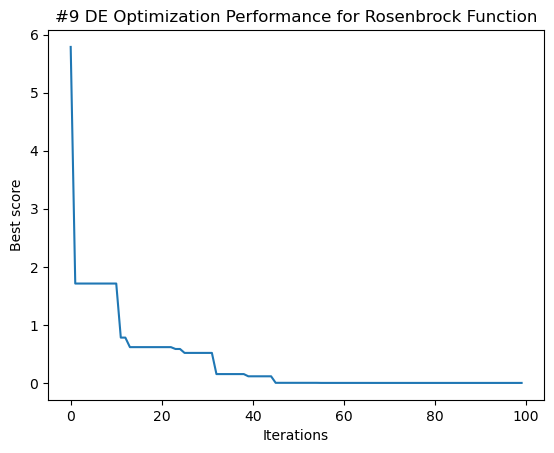

#10 Best solution: [1.00000007 1.00000011], Best score: 0.00000, Time taken: 0.00897 seconds


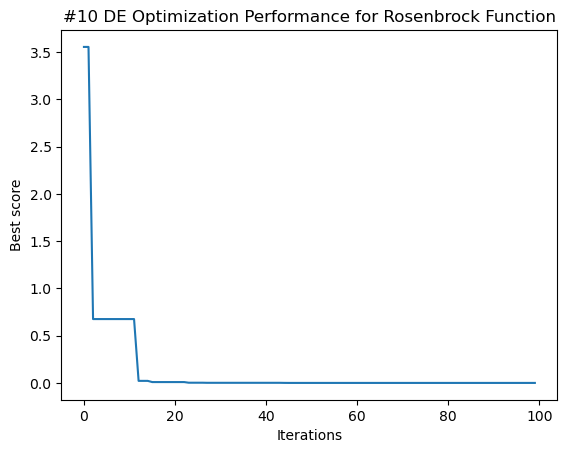

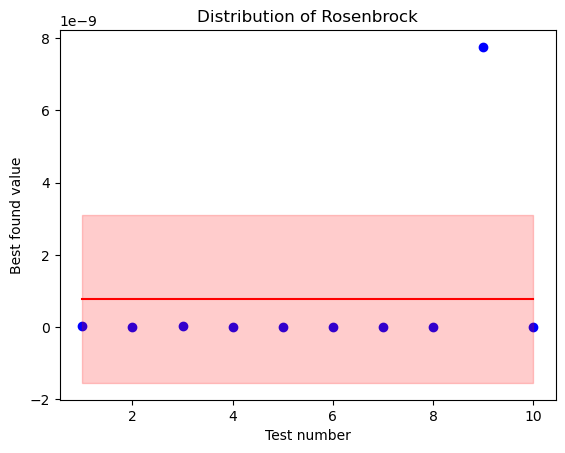

Dispersion is 5.407609010302681e-18


In [8]:
# Optimize Rosenbrock function
print("Optimizing Rosenbrock function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, rosenbrock_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Rosenbrock Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Rosenbrock")
print("Dispersion is " + str(np.var(best_values)))

In [9]:
@jit(nopython=True)
def de_jong_function(x):
    return np.sum(x**2)

Optimizing De Jong (Sphere) function
#1 Best solution: [ 1.64687307e-08 -9.60224543e-09], Best score: 0.00000, Time taken: 1.85911 seconds


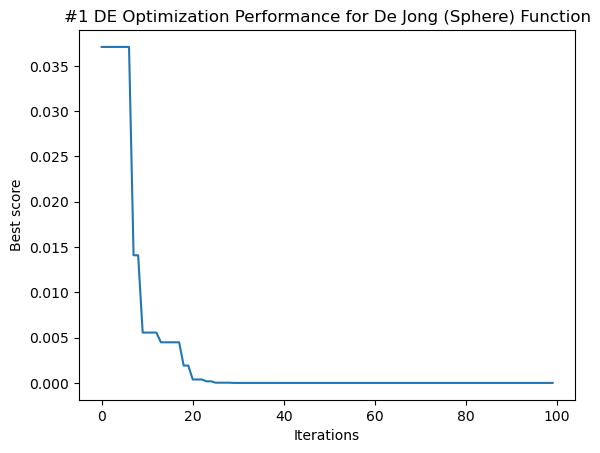

#2 Best solution: [4.14715665e-09 9.58976779e-09], Best score: 0.00000, Time taken: 0.00805 seconds


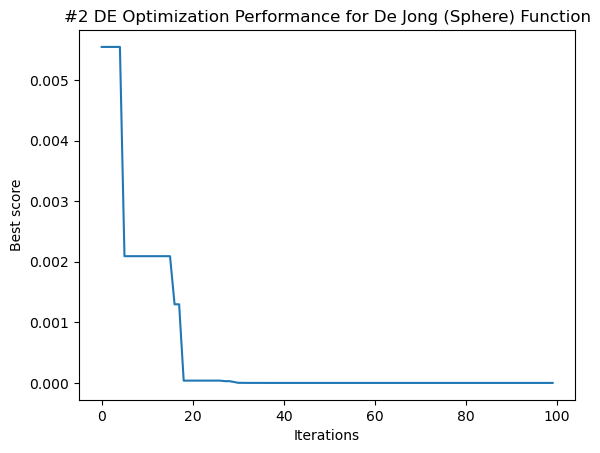

#3 Best solution: [-7.14931363e-10  4.63567248e-09], Best score: 0.00000, Time taken: 0.00736 seconds


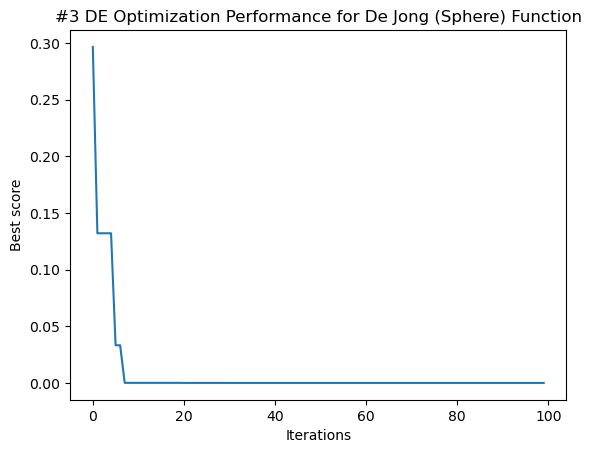

#4 Best solution: [ 8.86878955e-09 -6.79225275e-09], Best score: 0.00000, Time taken: 0.01043 seconds


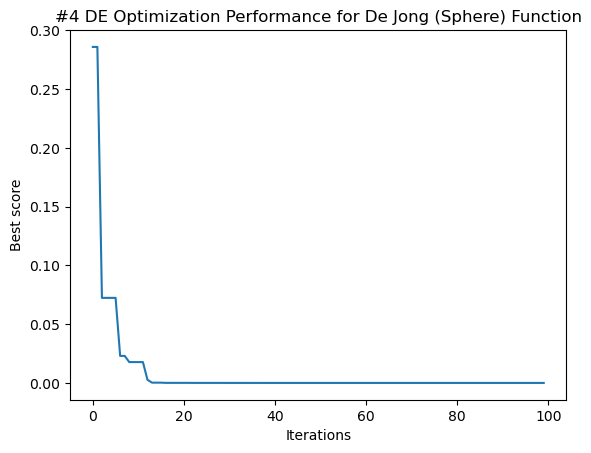

#5 Best solution: [2.55079599e-09 1.84078442e-09], Best score: 0.00000, Time taken: 0.01003 seconds


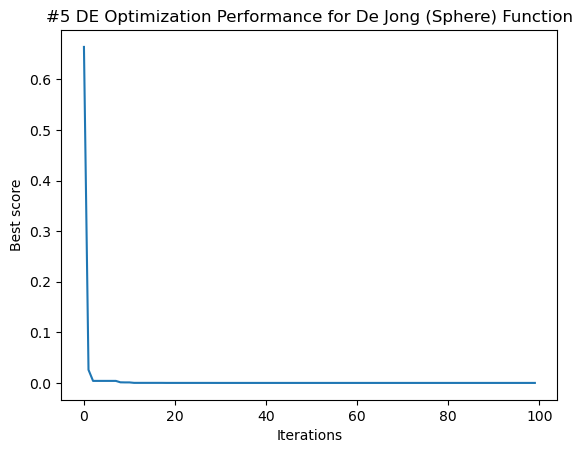

#6 Best solution: [-2.02922094e-09  2.94808015e-09], Best score: 0.00000, Time taken: 0.00888 seconds


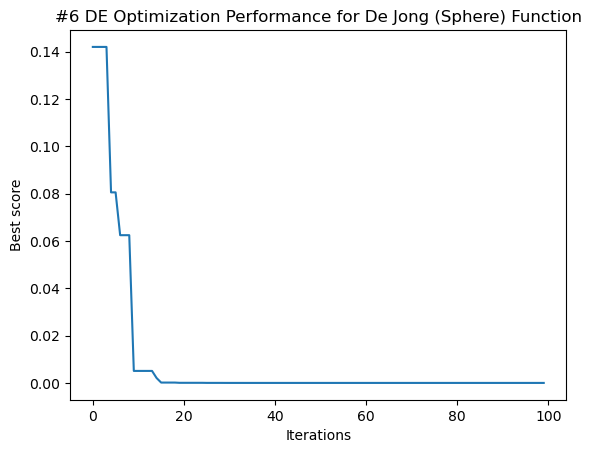

#7 Best solution: [ 2.53269401e-09 -3.85189475e-09], Best score: 0.00000, Time taken: 0.00841 seconds


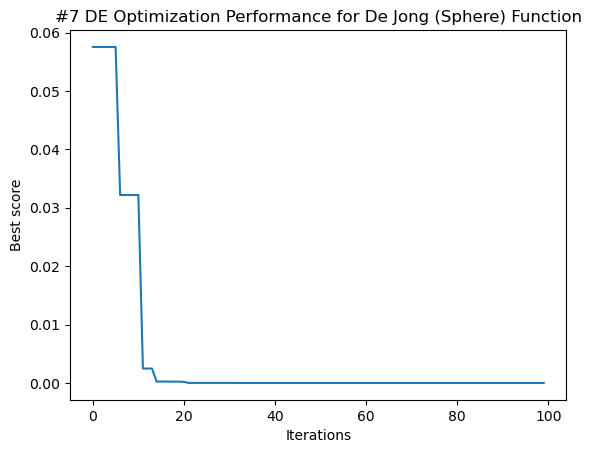

#8 Best solution: [-2.55328410e-09  1.41193223e-08], Best score: 0.00000, Time taken: 0.00708 seconds


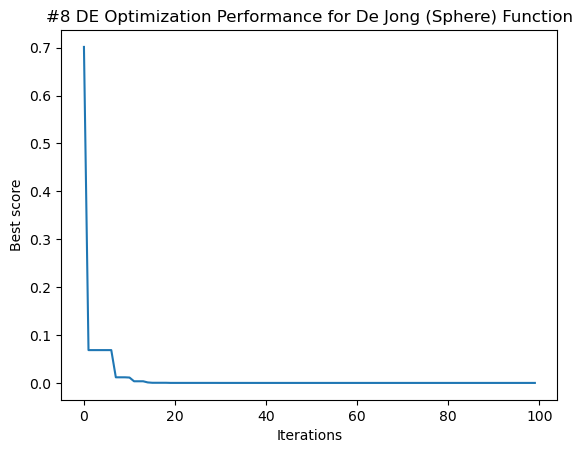

#9 Best solution: [-4.56231386e-09  8.83202210e-09], Best score: 0.00000, Time taken: 0.01583 seconds


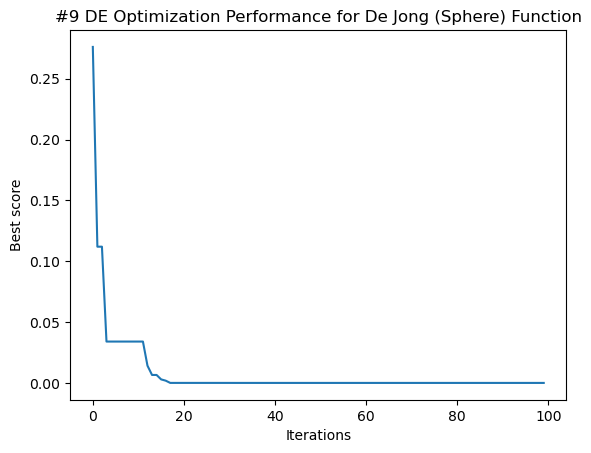

#10 Best solution: [-2.52065984e-08  8.79519997e-09], Best score: 0.00000, Time taken: 0.01903 seconds


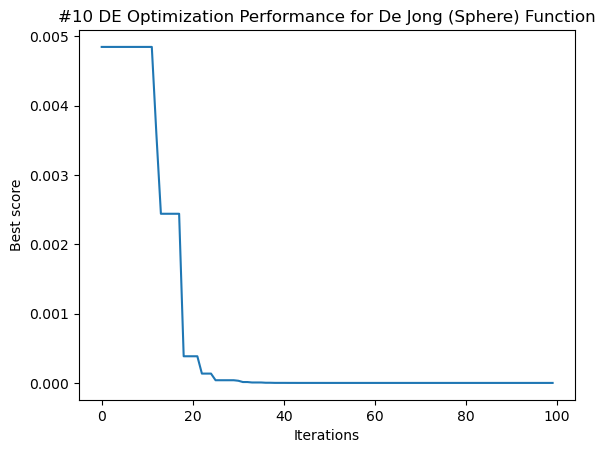

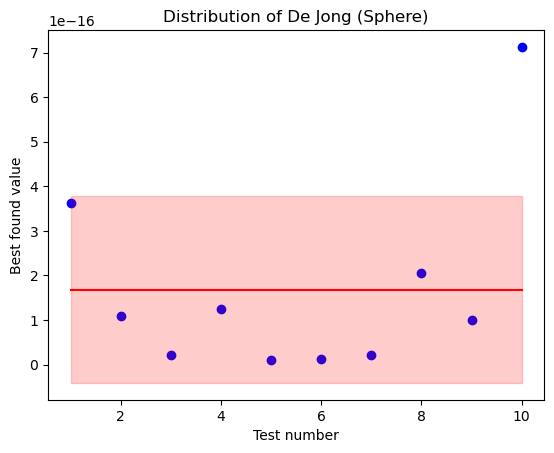

Dispersion is 4.384002810018981e-32


In [10]:
# Optimize De Jong (Sphere) function
print("Optimizing De Jong (Sphere) function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, de_jong_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for De Jong (Sphere) Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "De Jong (Sphere)")
print("Dispersion is " + str(np.var(best_values)))

In [11]:
@jit(nopython=True)
def schwefel_function(x_ptr):
    x = np.clip(x_ptr, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

Optimizing Schwefel function
#1 Best solution: [-420.9691808  -420.96862034], Best score: -837.96577, Time taken: 1.62210 seconds


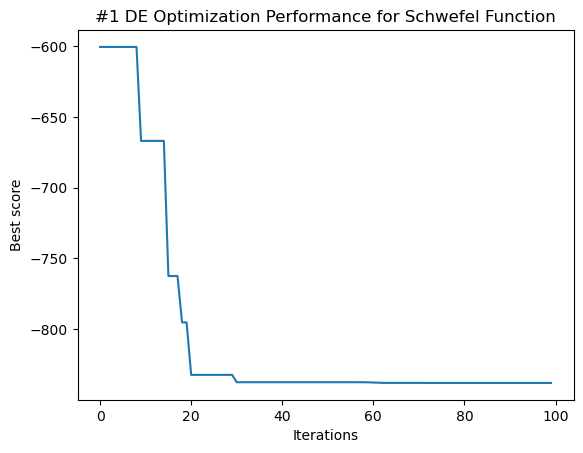

#2 Best solution: [-420.99589327 -420.94241148], Best score: -837.96559, Time taken: 0.00855 seconds


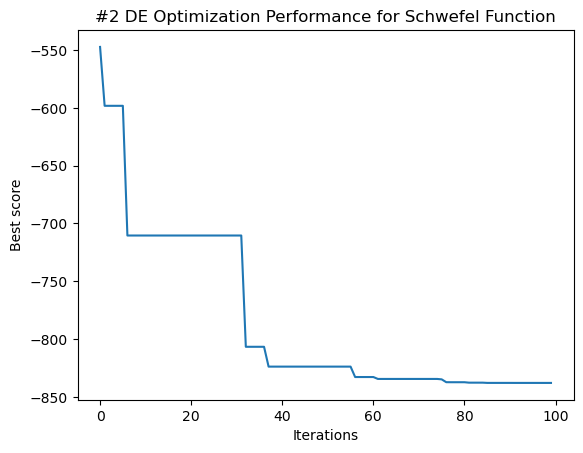

#3 Best solution: [-420.96999123 -420.97022476], Best score: -837.96577, Time taken: 0.00996 seconds


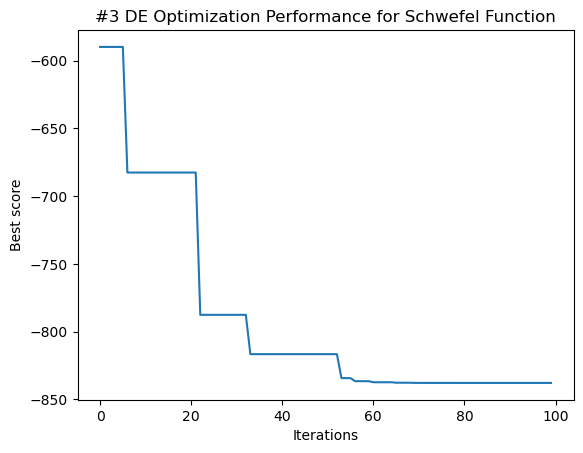

#4 Best solution: [-420.96904521 -420.96838533], Best score: -837.96577, Time taken: 0.01850 seconds


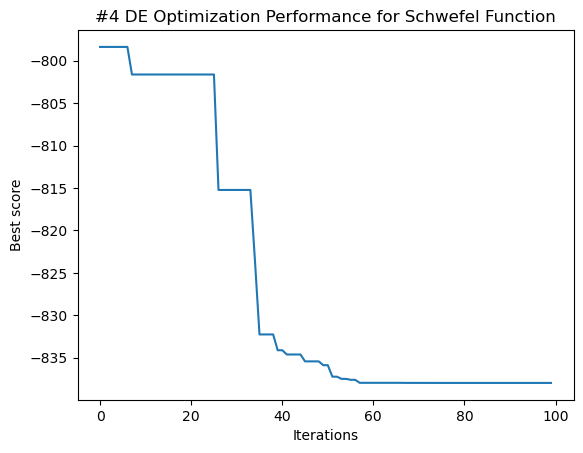

#5 Best solution: [-420.9667113  -420.97515748], Best score: -837.96577, Time taken: 0.00810 seconds


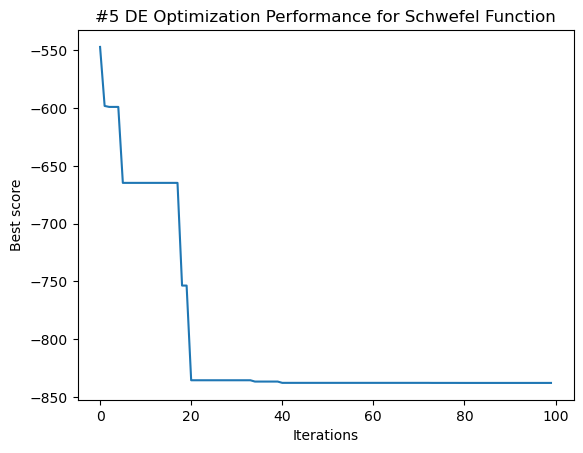

#6 Best solution: [-420.97941871 -420.9539268 ], Best score: -837.96573, Time taken: 0.01658 seconds


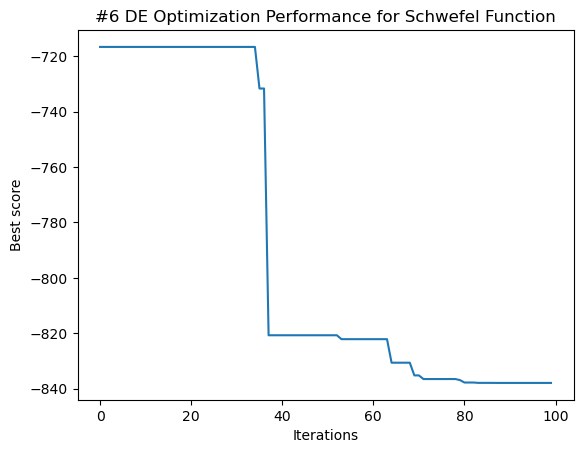

#7 Best solution: [-420.96875698 -420.96762322], Best score: -837.96577, Time taken: 0.01760 seconds


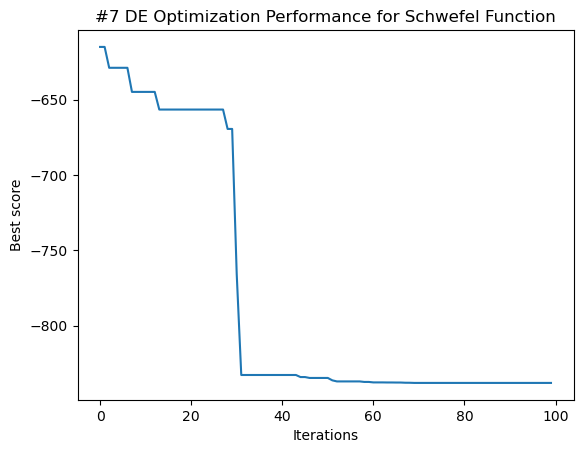

#8 Best solution: [-420.97131893 -420.95340894], Best score: -837.96574, Time taken: 0.00922 seconds


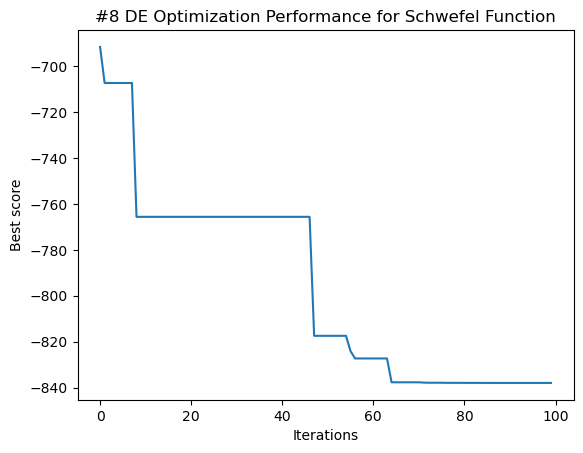

#9 Best solution: [-420.96963018 -420.96950566], Best score: -837.96577, Time taken: 0.01674 seconds


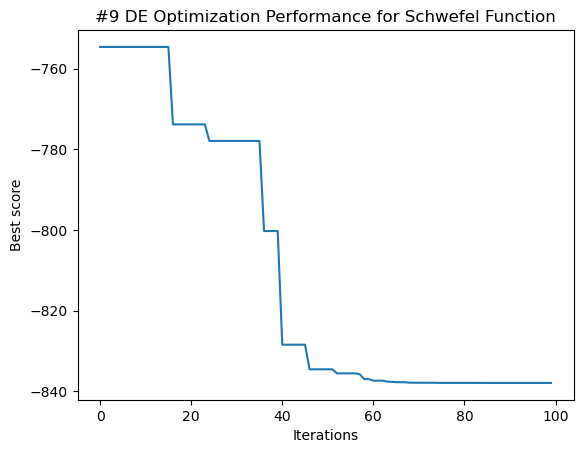

#10 Best solution: [-420.96965557 -420.96928442], Best score: -837.96577, Time taken: 0.00770 seconds


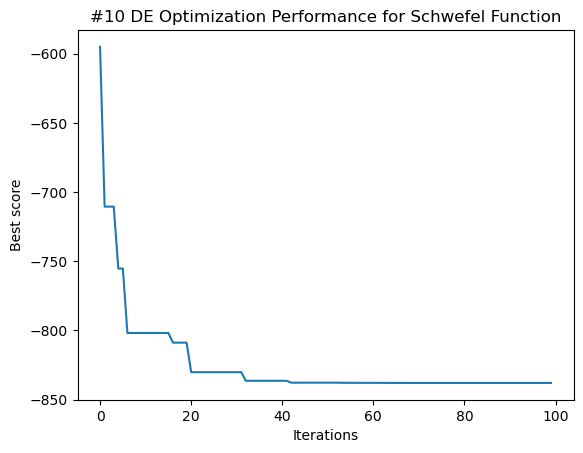

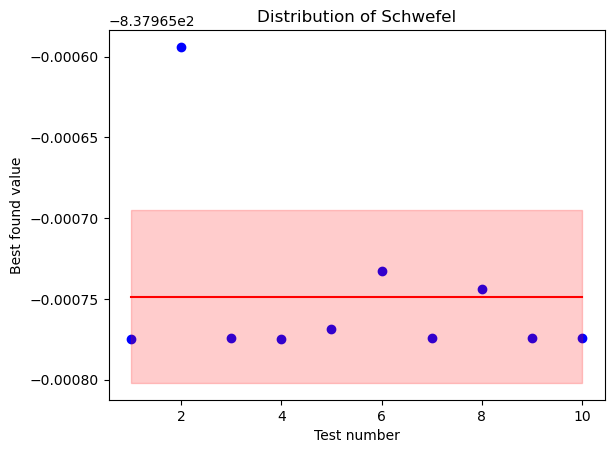

Dispersion is 2.8566548443798375e-09


In [12]:
# Optimize Schwefel function
print("Optimizing Schwefel function")
bounds = np.array([[-500, 500], [-500, 500]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, schwefel_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Schwefel Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Schwefel")
print("Dispersion is " + str(np.var(best_values)))

In [13]:
@jit(nopython=True)
def sum_of_different_powers_function(x):
    return np.sum(np.abs(x)**(np.arange(2, len(x) + 2)))

Optimizing Sum of different powers function
#1 Best solution: [ 1.44454731e-10 -1.25519304e-08], Best score: 0.00000, Time taken: 2.01618 seconds


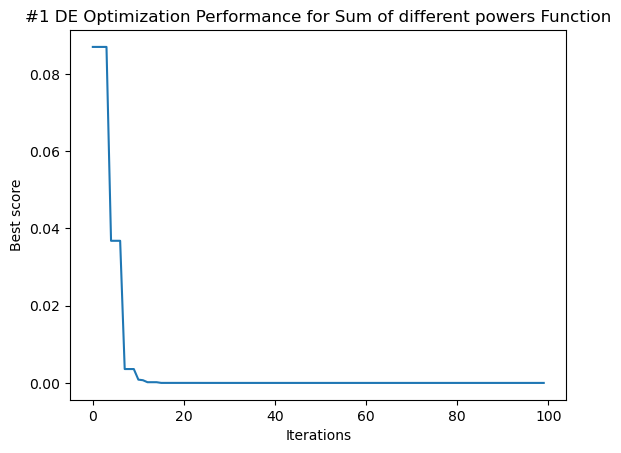

#2 Best solution: [ 1.46451491e-10 -5.37372684e-08], Best score: 0.00000, Time taken: 0.00845 seconds


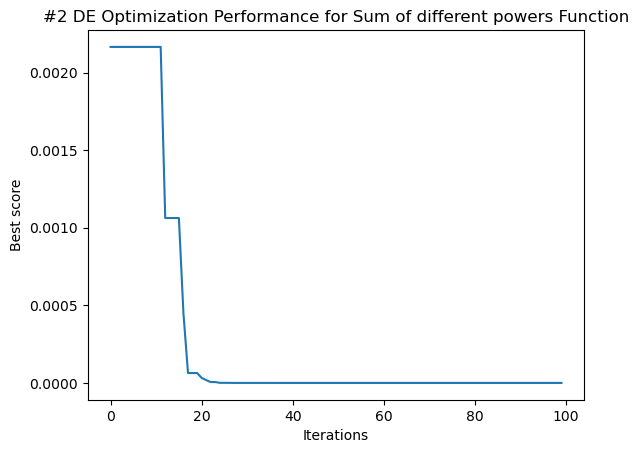

#3 Best solution: [-2.86455475e-10 -7.82431650e-08], Best score: 0.00000, Time taken: 0.01493 seconds


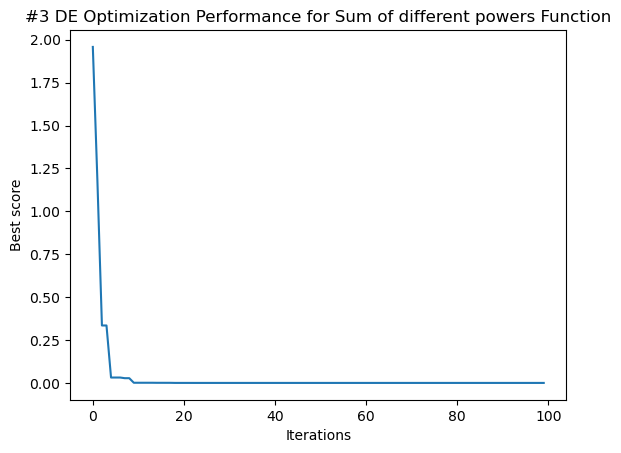

#4 Best solution: [ 3.84054387e-10 -5.72024899e-07], Best score: 0.00000, Time taken: 0.00865 seconds


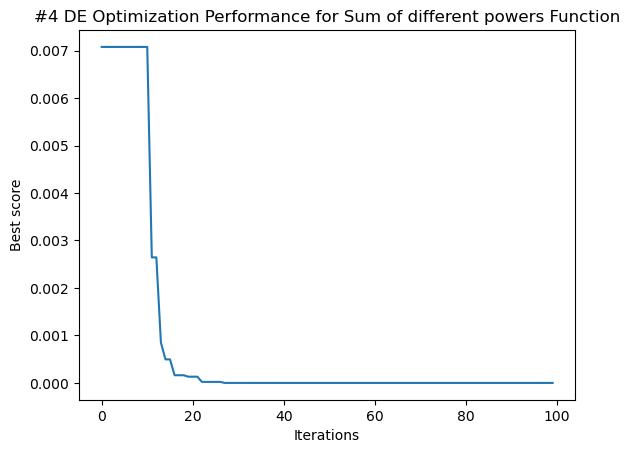

#5 Best solution: [ 7.83222573e-10 -6.09260658e-07], Best score: 0.00000, Time taken: 0.00986 seconds


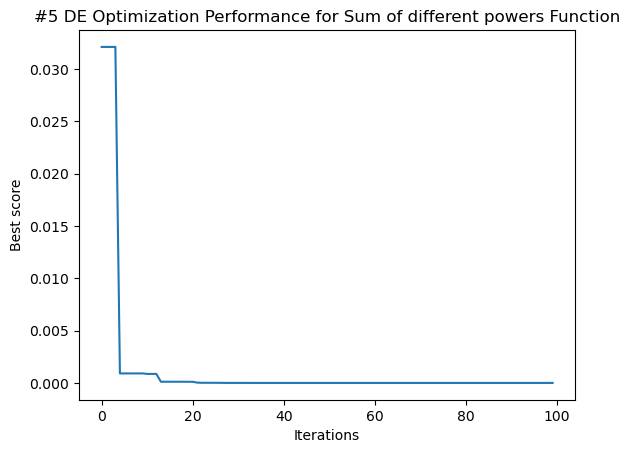

#6 Best solution: [-9.37127843e-10  4.21701226e-08], Best score: 0.00000, Time taken: 0.01032 seconds


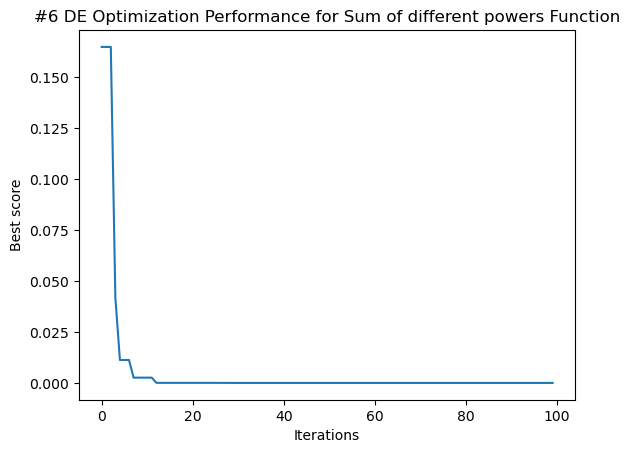

#7 Best solution: [ 8.06846807e-10 -1.99922992e-07], Best score: 0.00000, Time taken: 0.01280 seconds


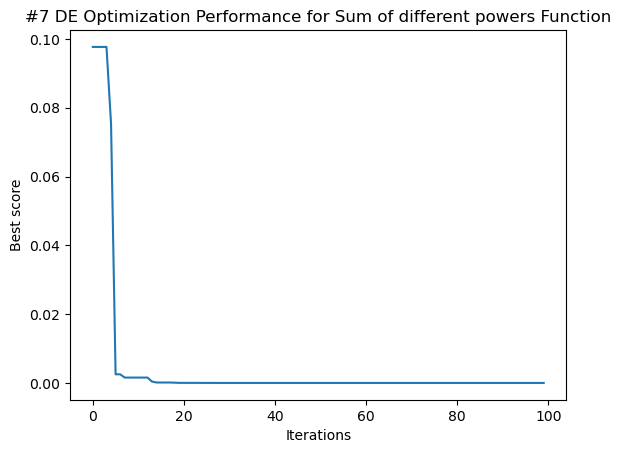

#8 Best solution: [-5.11885931e-10 -2.45576825e-07], Best score: 0.00000, Time taken: 0.01020 seconds


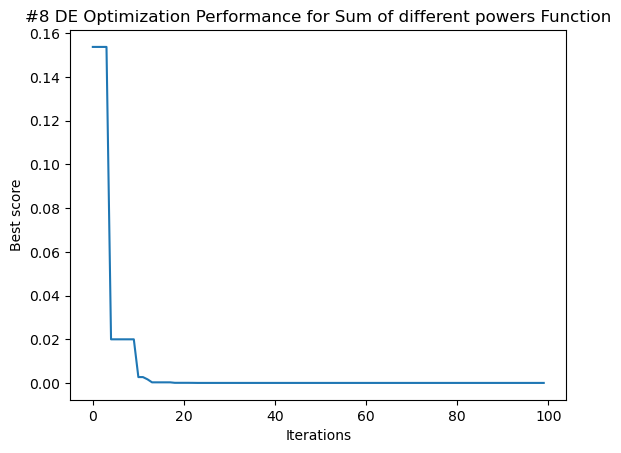

#9 Best solution: [2.32257638e-10 1.14863567e-07], Best score: 0.00000, Time taken: 0.00918 seconds


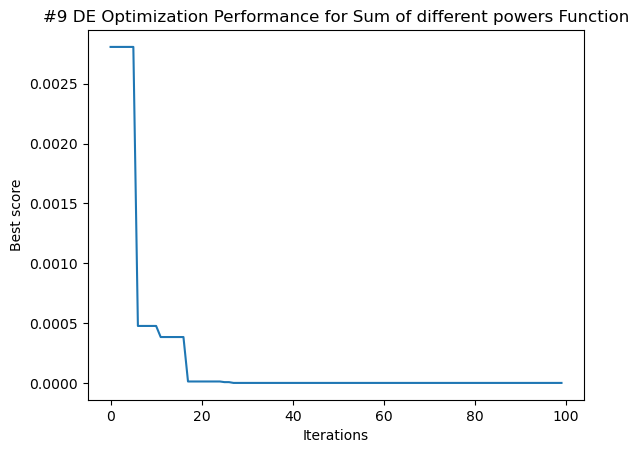

#10 Best solution: [-2.02012695e-10 -1.75521932e-07], Best score: 0.00000, Time taken: 0.01218 seconds


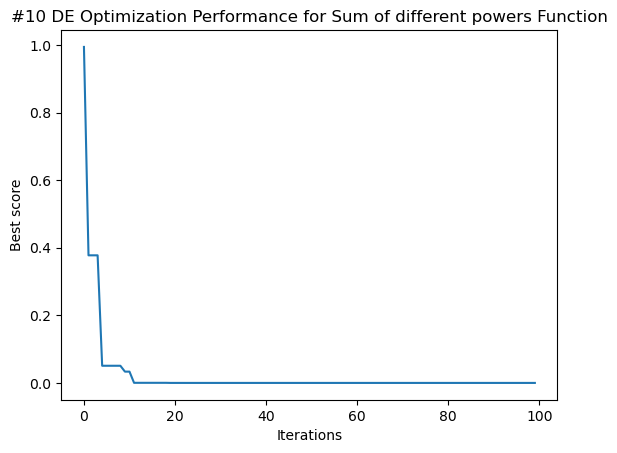

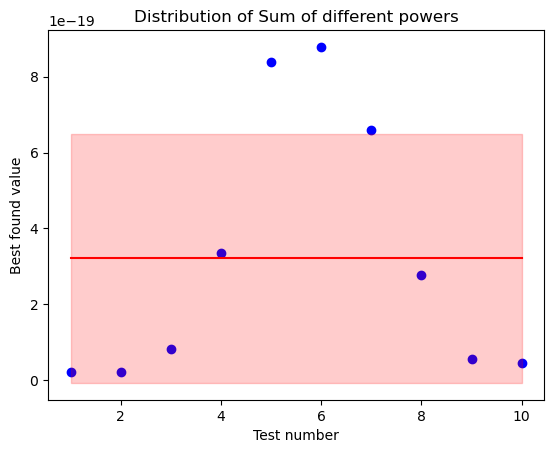

Dispersion is 1.0784787057137954e-37


In [14]:
# Optimize Sum of different powers function
print("Optimizing Sum of different powers function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, sum_of_different_powers_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Sum of different powers Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Sum of different powers")
print("Dispersion is " + str(np.var(best_values)))

In [15]:
@jit(nopython=True)
def booth_function(x):
    return (x[0] + 2*x[1] - 7)**2 + (2*x[0] + x[1] - 5)**2

Optimizing Booth function
#1 Best solution: [1. 3.], Best score: 0.00000, Time taken: 1.82562 seconds


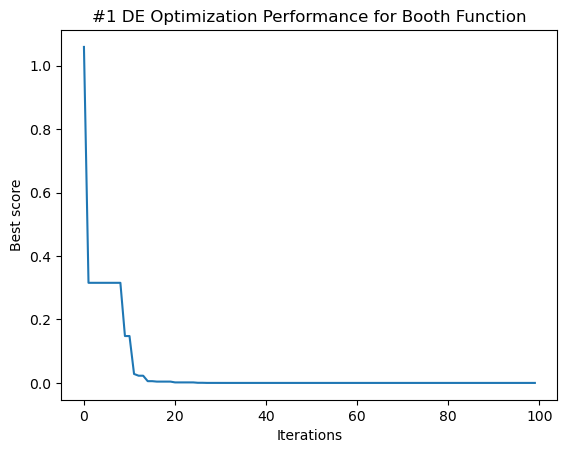

#2 Best solution: [1.00000004 2.99999998], Best score: 0.00000, Time taken: 0.00906 seconds


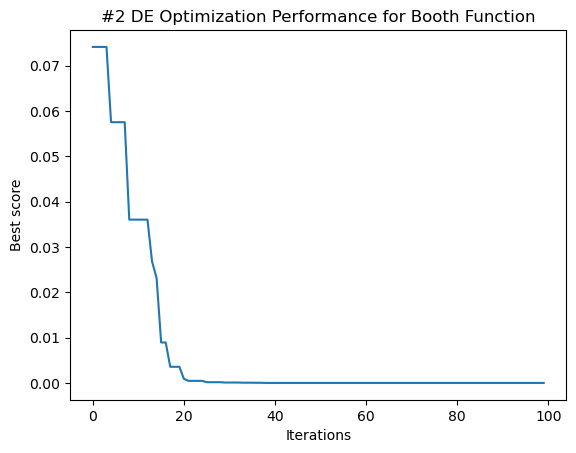

#3 Best solution: [1.         2.99999999], Best score: 0.00000, Time taken: 0.01041 seconds


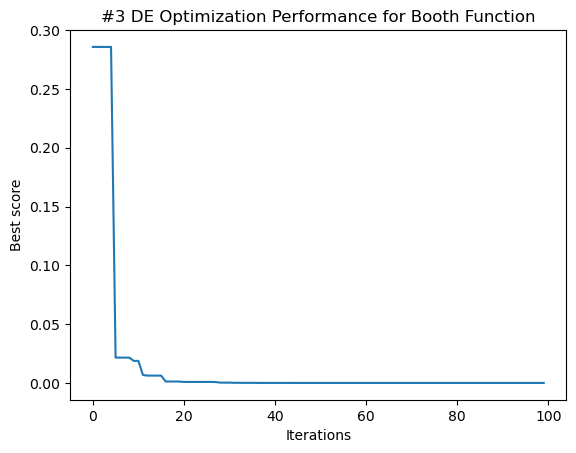

#4 Best solution: [1.         2.99999998], Best score: 0.00000, Time taken: 0.00733 seconds


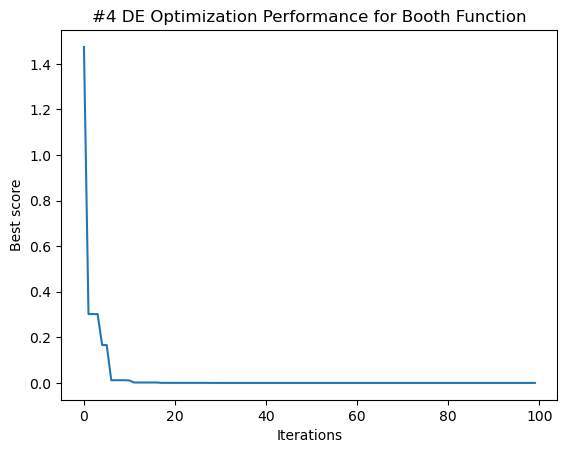

#5 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.00760 seconds


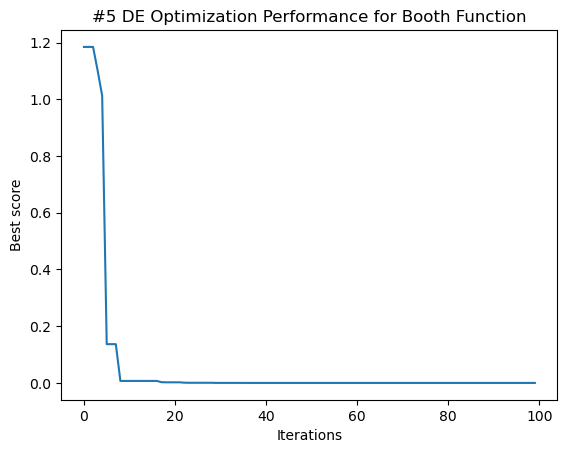

#6 Best solution: [0.99999999 3.00000001], Best score: 0.00000, Time taken: 0.01000 seconds


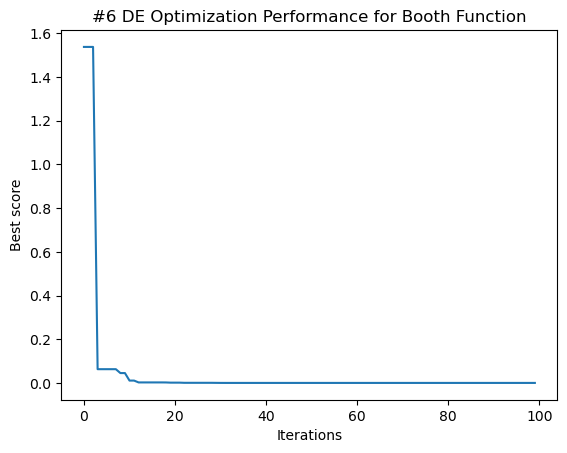

#7 Best solution: [1. 3.], Best score: 0.00000, Time taken: 0.00627 seconds


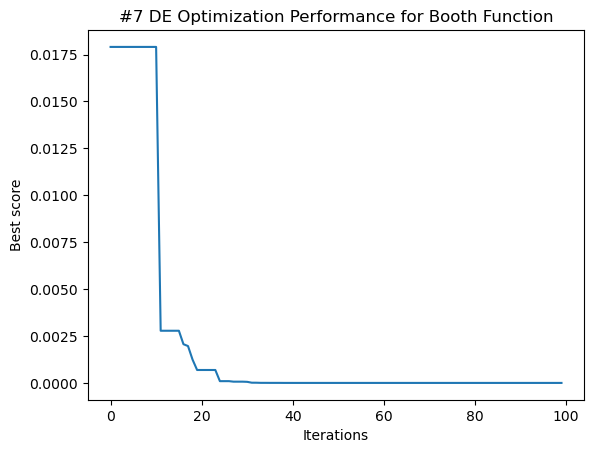

#8 Best solution: [1.         3.00000003], Best score: 0.00000, Time taken: 0.01432 seconds


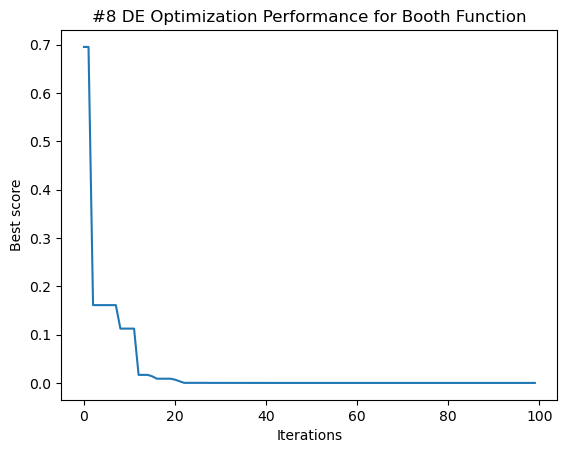

#9 Best solution: [1.00000003 2.99999999], Best score: 0.00000, Time taken: 0.00777 seconds


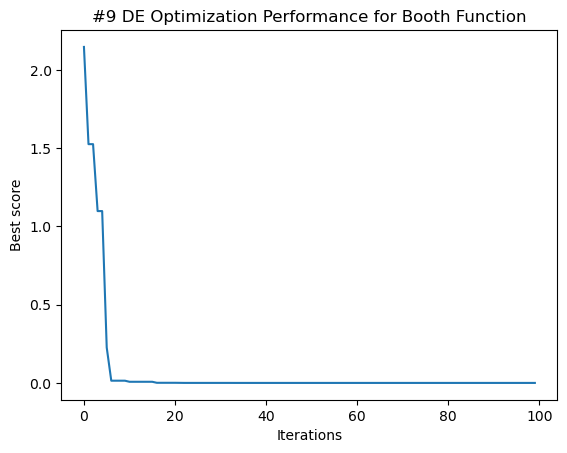

#10 Best solution: [1.00000005 2.99999994], Best score: 0.00000, Time taken: 0.01381 seconds


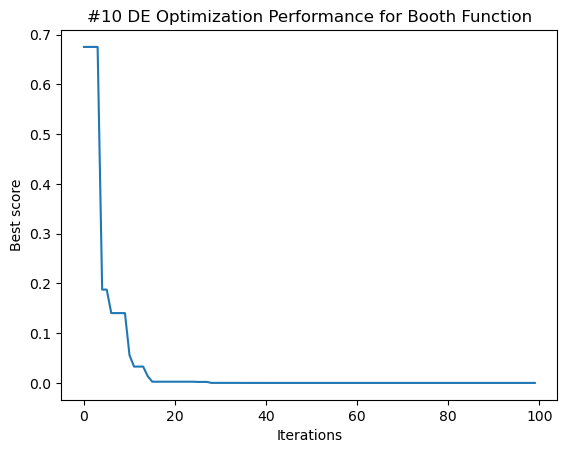

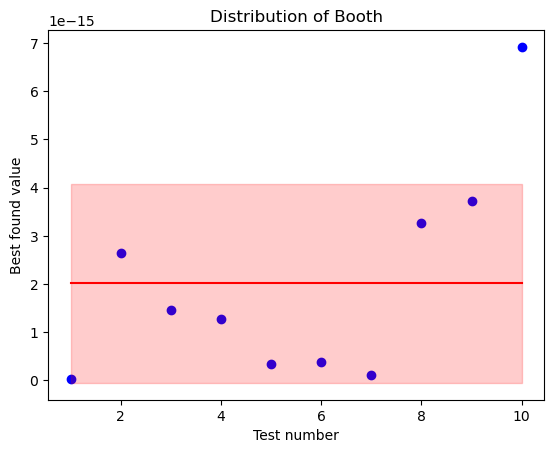

Dispersion is 4.273386296620034e-30


In [16]:
# Optimize Booth function
print("Optimizing Booth function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, booth_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Booth Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Booth")
print("Dispersion is " + str(np.var(best_values)))

In [17]:
@jit(nopython=True)
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2 + (2.25 - x[0] + x[0]*x[1]**2)**2 + (2.625 - x[0] + x[0]*x[1]**3)**2

Optimizing Beale function
#1 Best solution: [2.99999986 0.49999996], Best score: 0.00000, Time taken: 1.46272 seconds


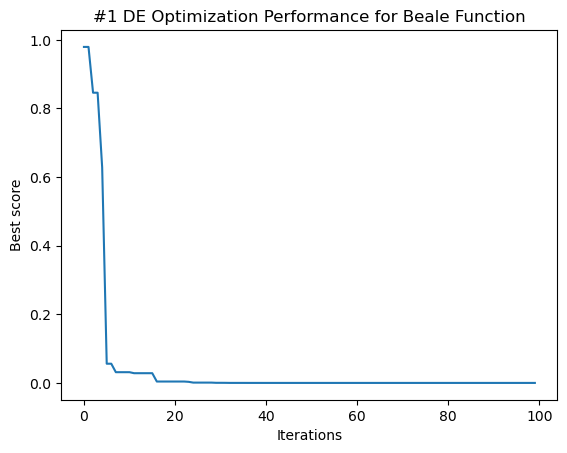

#2 Best solution: [2.99999933 0.49999993], Best score: 0.00000, Time taken: 0.01067 seconds


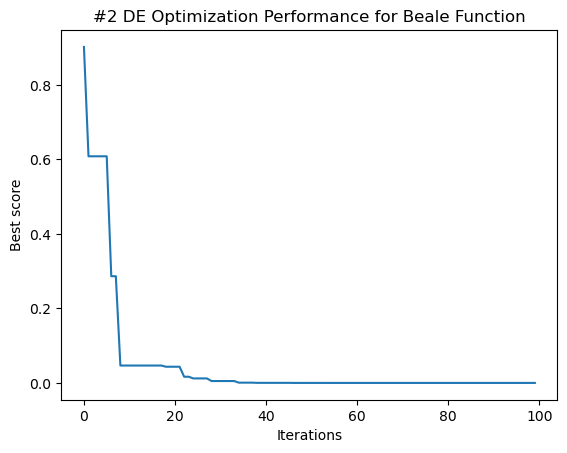

#3 Best solution: [3.00000012 0.50000001], Best score: 0.00000, Time taken: 0.00710 seconds


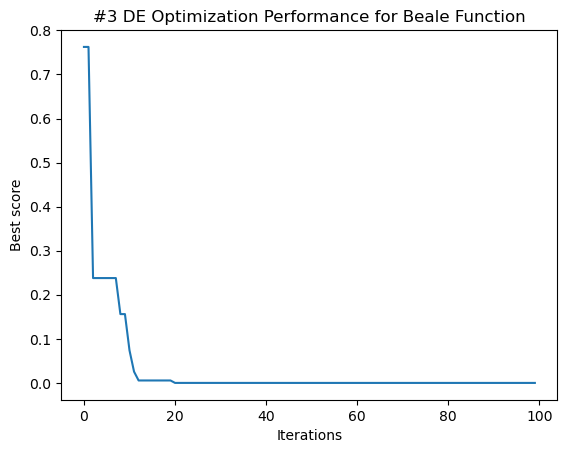

#4 Best solution: [2.99999987 0.49999998], Best score: 0.00000, Time taken: 0.00716 seconds


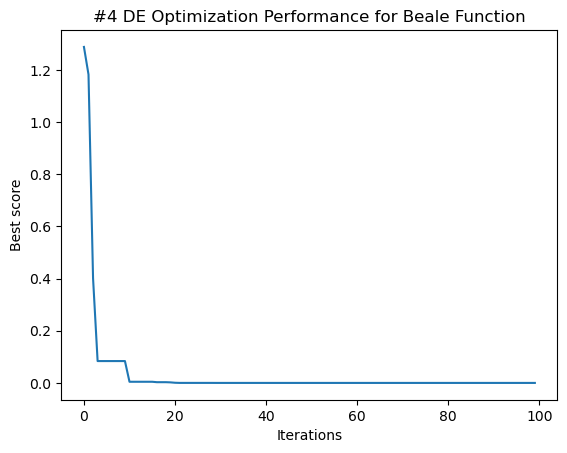

#5 Best solution: [3.00000021 0.50000008], Best score: 0.00000, Time taken: 0.01392 seconds


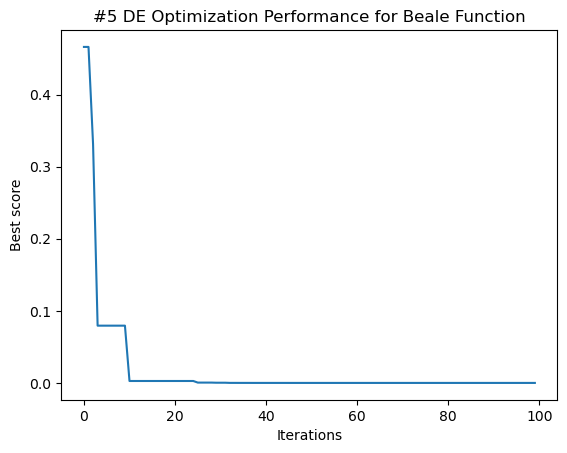

#6 Best solution: [3.00000041 0.50000001], Best score: 0.00000, Time taken: 0.00861 seconds


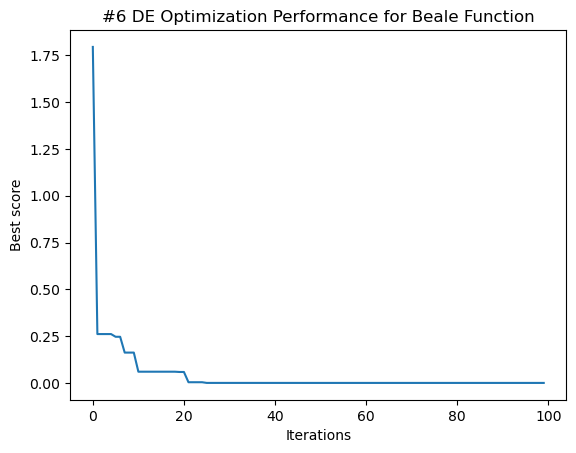

#7 Best solution: [2.99999992 0.50000002], Best score: 0.00000, Time taken: 0.00704 seconds


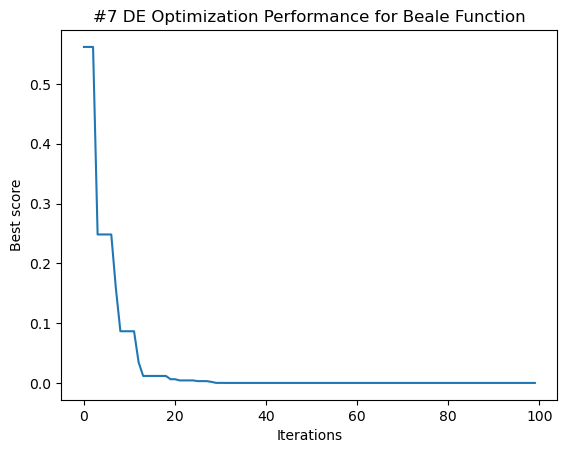

#8 Best solution: [2.99999939 0.49999993], Best score: 0.00000, Time taken: 0.00938 seconds


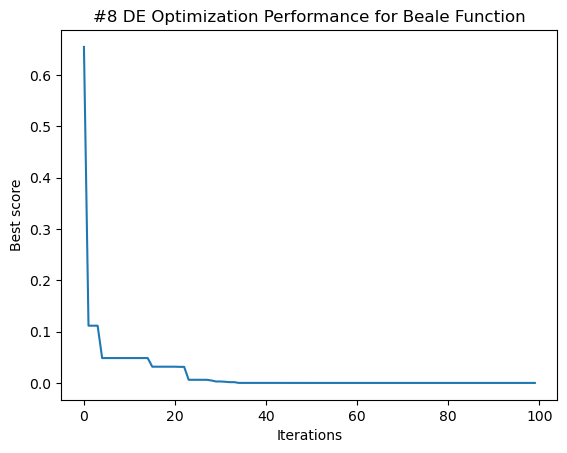

#9 Best solution: [3.00000032 0.50000007], Best score: 0.00000, Time taken: 0.00735 seconds


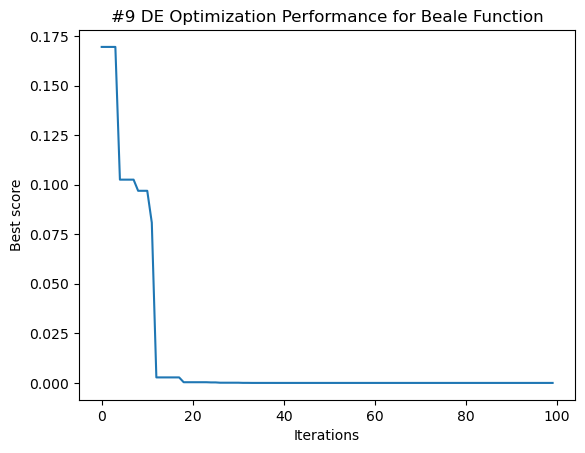

#10 Best solution: [2.99999996 0.49999998], Best score: 0.00000, Time taken: 0.00783 seconds


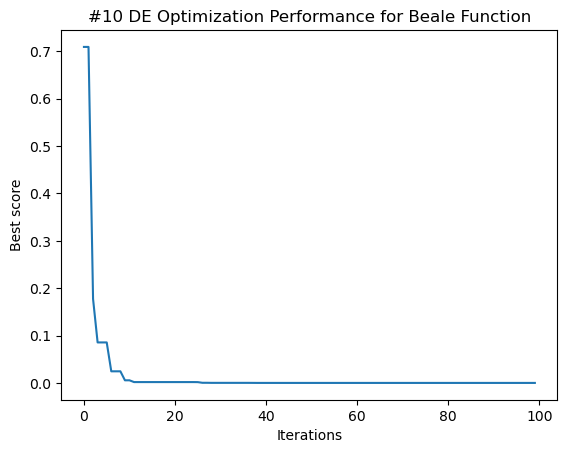

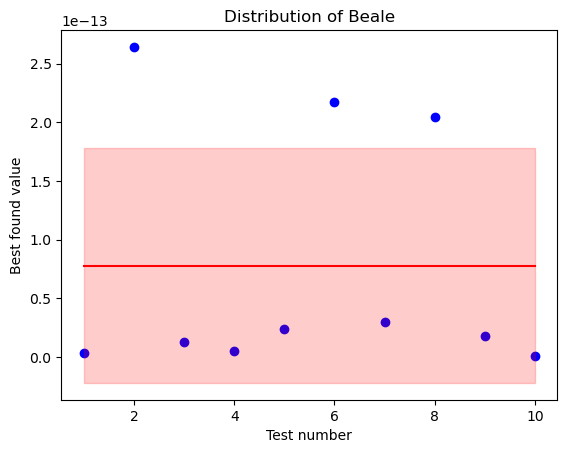

Dispersion is 9.99412839053143e-27


In [18]:
# Optimize Beale function
print("Optimizing Beale function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, beale_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Beale Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Beale")
print("Dispersion is " + str(np.var(best_values)))

In [19]:
@jit(nopython=True)
def goldstein_price_function(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

Optimizing Goldstein-Price function
#1 Best solution: [-1.67856360e-08 -1.00000001e+00], Best score: 3.00000, Time taken: 1.47087 seconds


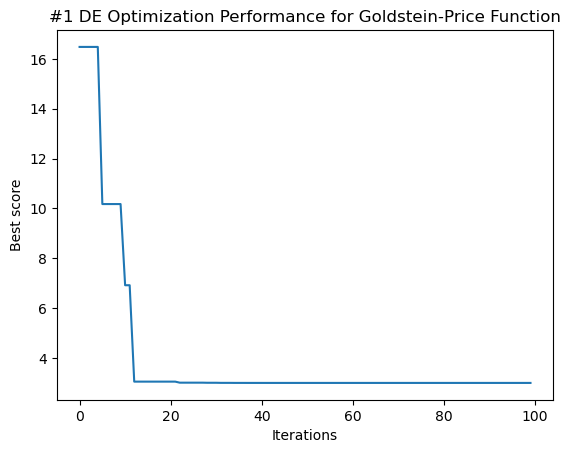

#2 Best solution: [ 2.47040974e-08 -1.00000001e+00], Best score: 3.00000, Time taken: 0.00742 seconds


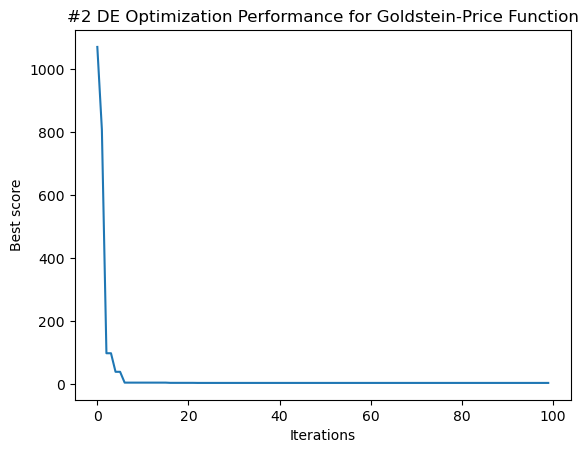

#3 Best solution: [-1.46091456e-08 -9.99999967e-01], Best score: 3.00000, Time taken: 0.01324 seconds


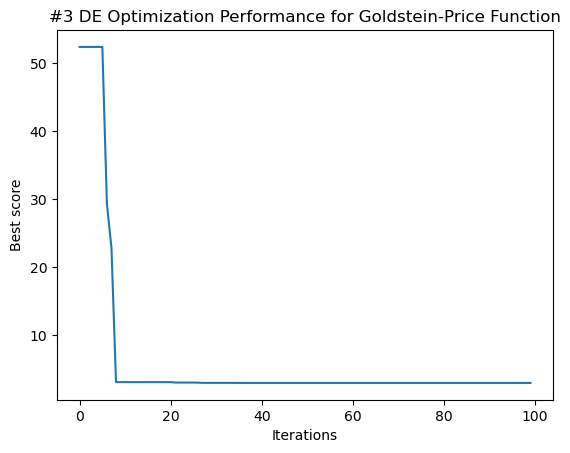

#4 Best solution: [-4.61124455e-08 -1.00000007e+00], Best score: 3.00000, Time taken: 0.01017 seconds


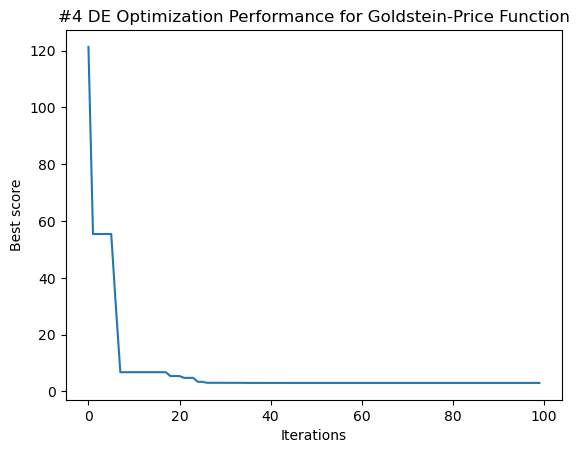

#5 Best solution: [ 2.00811170e-08 -1.00000003e+00], Best score: 3.00000, Time taken: 0.00766 seconds


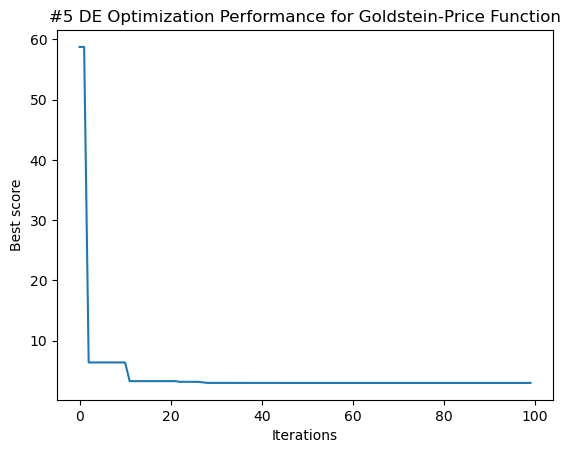

#6 Best solution: [-2.57463741e-08 -1.00000001e+00], Best score: 3.00000, Time taken: 0.00970 seconds


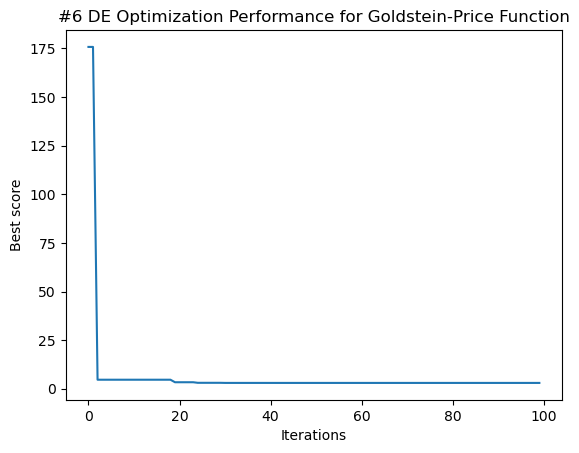

#7 Best solution: [-6.34090236e-09 -1.00000000e+00], Best score: 3.00000, Time taken: 0.00650 seconds


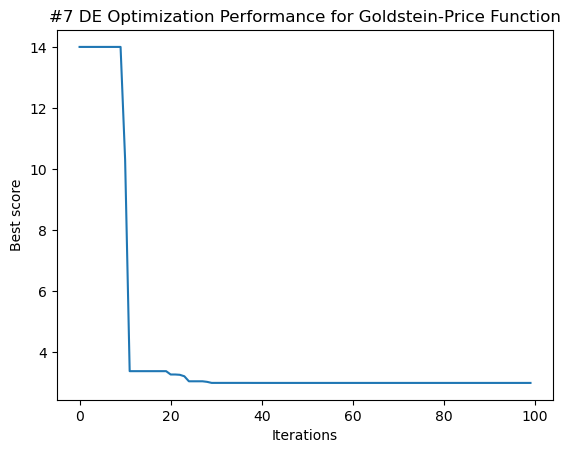

#8 Best solution: [ 1.13886599e-08 -1.00000000e+00], Best score: 3.00000, Time taken: 0.00964 seconds


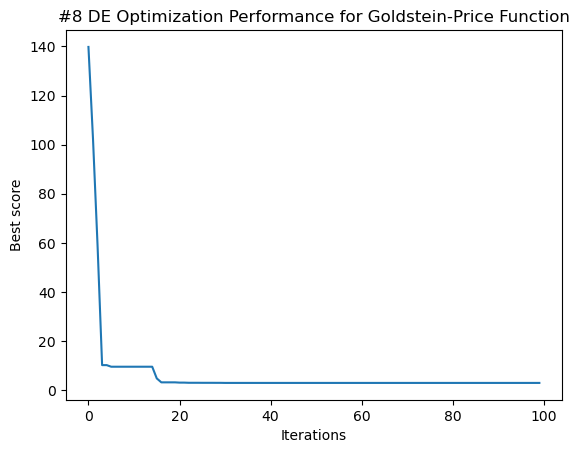

#9 Best solution: [-1.86404160e-08 -9.99999978e-01], Best score: 3.00000, Time taken: 0.00615 seconds


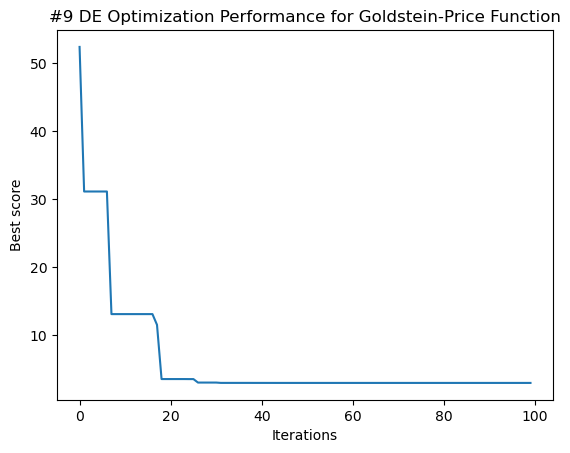

#10 Best solution: [ 1.18407744e-08 -9.99999995e-01], Best score: 3.00000, Time taken: 0.00845 seconds


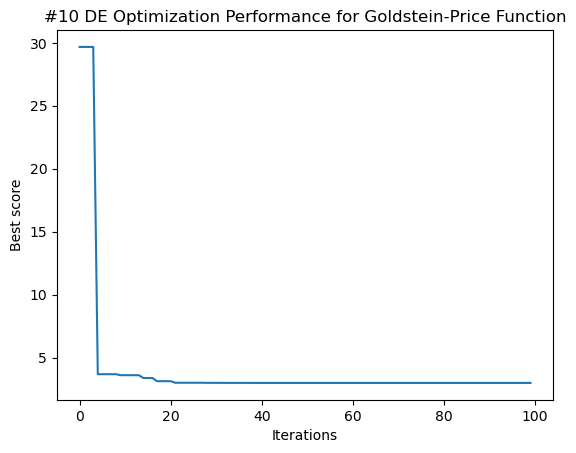

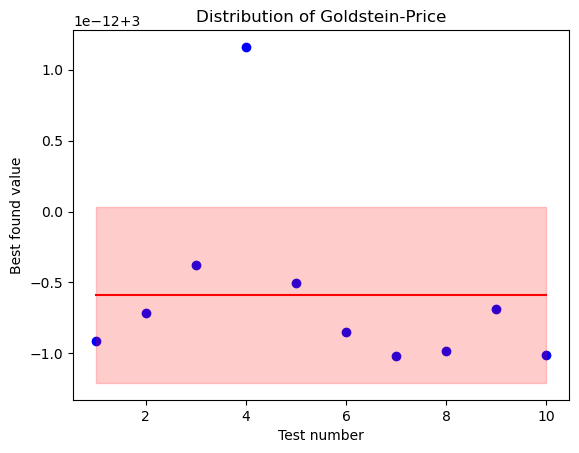

Dispersion is 3.8333246157301725e-25


In [20]:
# Optimize Goldstein-Price function
print("Optimizing Goldstein-Price function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, goldstein_price_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Goldstein-Price Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Goldstein-Price")
print("Dispersion is " + str(np.var(best_values)))

In [21]:
@jit(nopython=True)
def zakharov_function(x):
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

Optimizing Zakharov function
#1 Best solution: [-2.35008476e-08  6.17429412e-09], Best score: 0.00000, Time taken: 2.37580 seconds


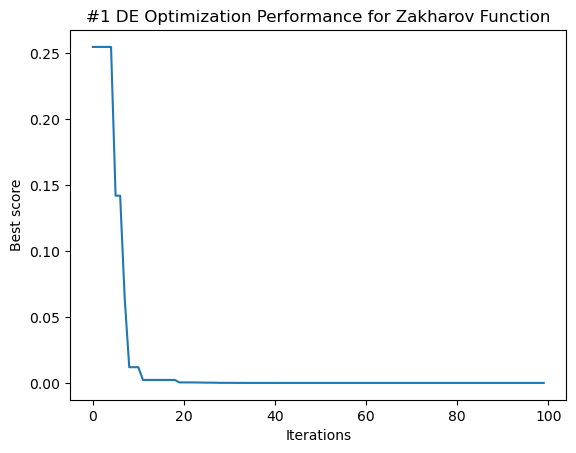

#2 Best solution: [-1.24833113e-09  4.89982269e-09], Best score: 0.00000, Time taken: 0.01519 seconds


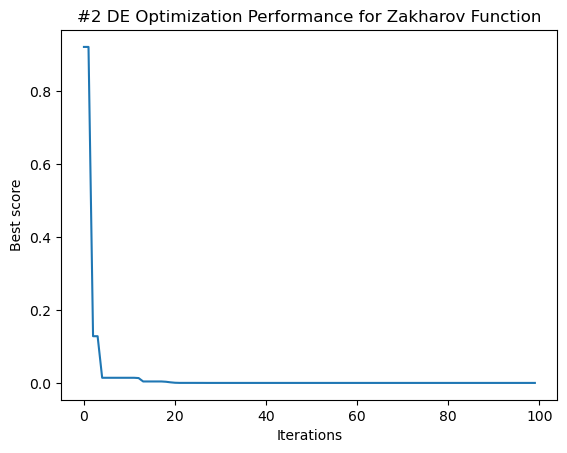

#3 Best solution: [-1.81863999e-08  8.03878834e-09], Best score: 0.00000, Time taken: 0.01317 seconds


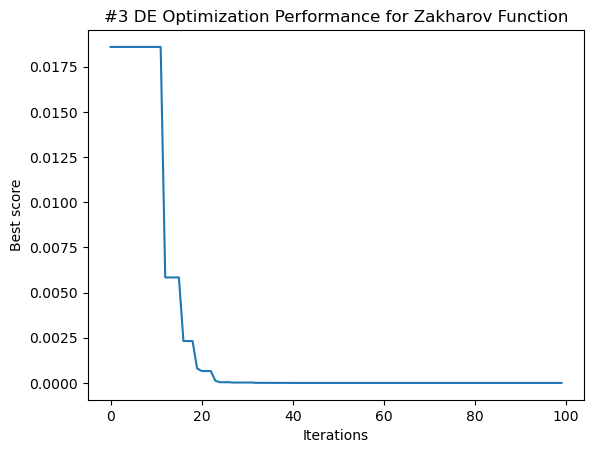

#4 Best solution: [-1.38648634e-08  1.05638644e-08], Best score: 0.00000, Time taken: 0.01209 seconds


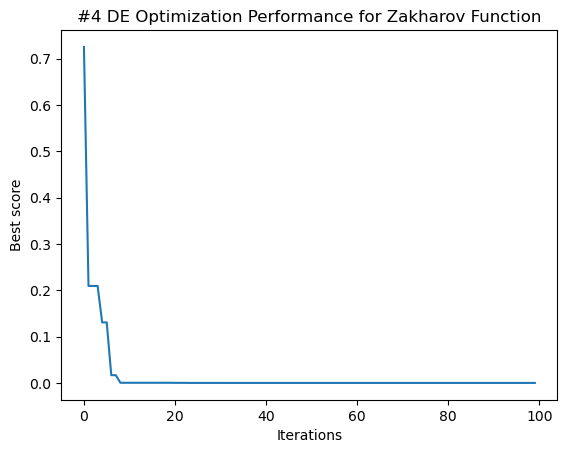

#5 Best solution: [ 1.67522642e-09 -2.41036398e-09], Best score: 0.00000, Time taken: 0.01281 seconds


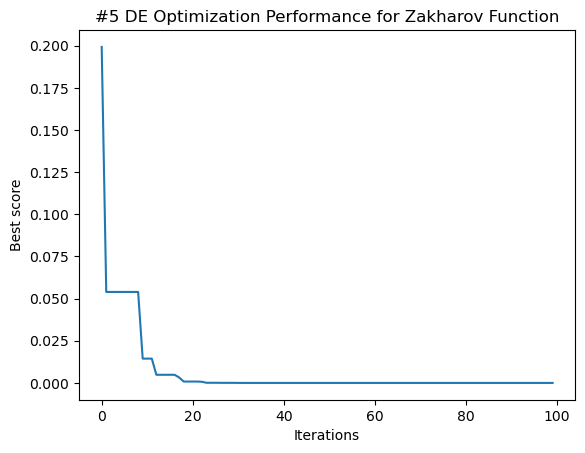

#6 Best solution: [ 3.93244504e-09 -6.74773537e-09], Best score: 0.00000, Time taken: 0.01817 seconds


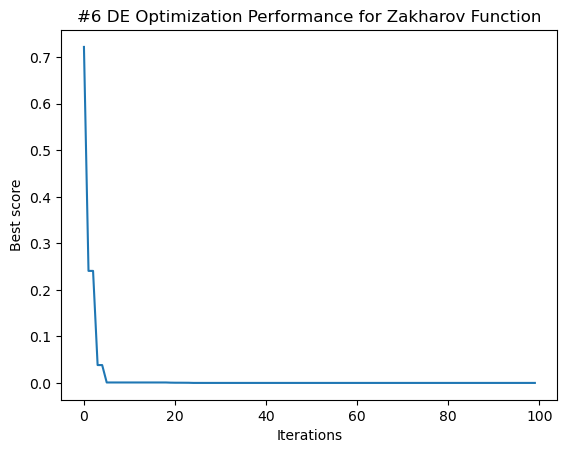

#7 Best solution: [-8.24304529e-09 -9.91652047e-09], Best score: 0.00000, Time taken: 0.02098 seconds


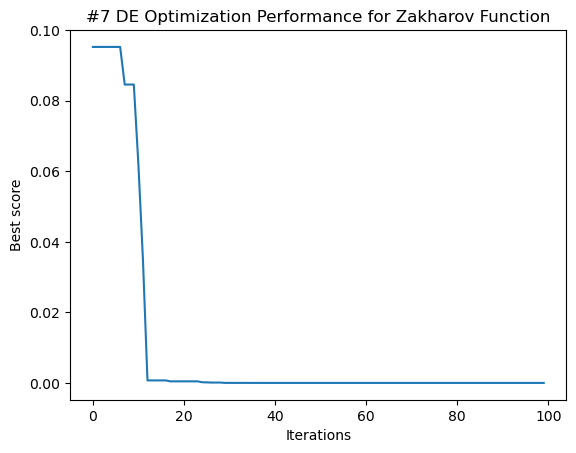

#8 Best solution: [ 1.90093710e-09 -2.92392874e-09], Best score: 0.00000, Time taken: 0.01128 seconds


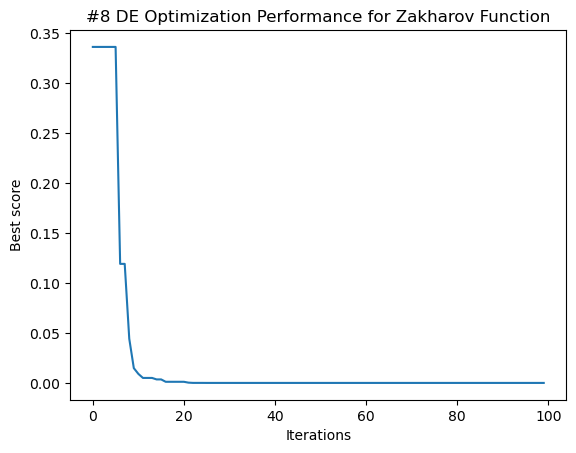

#9 Best solution: [ 7.36962428e-09 -2.34269082e-08], Best score: 0.00000, Time taken: 0.02454 seconds


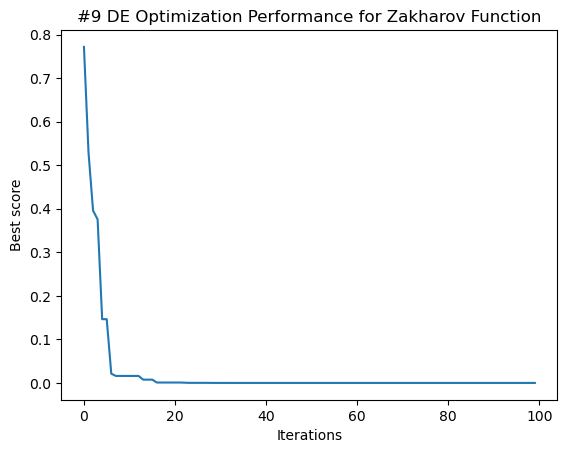

#10 Best solution: [4.22304376e-09 1.13565999e-08], Best score: 0.00000, Time taken: 0.01082 seconds


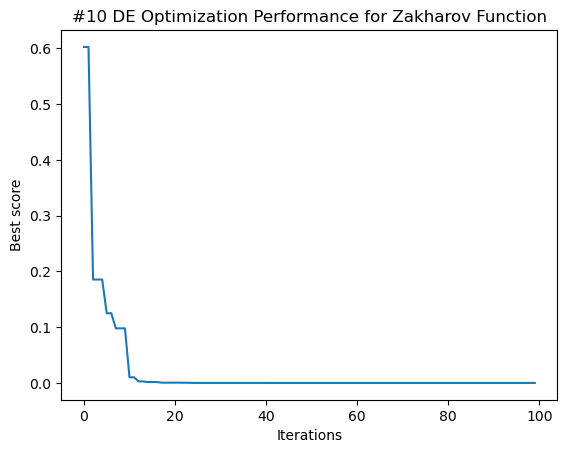

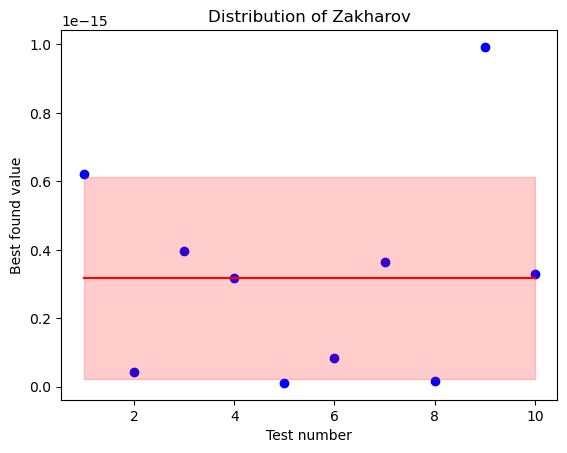

Dispersion is 8.712426926014683e-32


In [22]:
# Optimize Zakharov function
print("Optimizing Zakharov function")
bounds = np.array([[-5, 5], [-5, 5]])
best_values = []
time_average = 0.0
for i in range(TESTS_AMOUNT):
    (best_solution, best_score, performance), elapsed_time = performance_function(de_optimizer, zakharov_function, bounds)
    print(f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
    plt.figure()
    plt.title(f"#{i + 1} DE Optimization Performance for Zakharov Function")
    plot_performance(performance)
    best_values.append(best_score)
    time_average += elapsed_time
times_py.append(time_average / TESTS_AMOUNT)
draw_distribution_graphic(best_values, TESTS_AMOUNT, "Zakharov")
print("Dispersion is " + str(np.var(best_values)))

# Реализация на C

In [23]:
def c(file, name, types, result):
    path = os.path.abspath(file)
    module = ctypes.cdll.LoadLibrary(path)
    func = module[name]
    func.argtypes = types
    func.restype = result
    return func


function_type = ctypes.CFUNCTYPE(ctypes.c_float, ctypes.POINTER(ctypes.c_float))

de_optimizer = c(
    "C:/Users/7germ/OneDrive/Рабочий стол/DEonC/libcode.dll",
    "de_optimizer",
    (
        function_type,
        (ctypes.c_float * 2) * MAX_DIMENSIONS,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_int,
        ctypes.c_float,
        ctypes.c_float,
    ),
    ctypes.POINTER(ctypes.c_float)
)

In [24]:
def testing(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        result = de_optimizer(func, bounds, 2, 50, MAX_ITER, 0.8, 0.9)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {result[0], result[1]}, Best score: {result[2]:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(result[2])
    times.append(time_average / TESTS_AMOUNT)
    draw_distribution_graphic(best_values, TESTS_AMOUNT, func_name)
    print("Dispersion is " + str(np.var(best_values)))

# Функции для тестирования

In [25]:
def rosenbrock_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

Optimizing Rosenbrock function
#1 Best solution: (0.9999924898147583, 0.9999852180480957), Best score: 0.00000, Time taken: 0.25182 seconds
#2 Best solution: (1.0000001192092896, 1.000000238418579), Best score: 0.00000, Time taken: 0.17844 seconds
#3 Best solution: (1.0000001192092896, 1.0000001192092896), Best score: 0.00000, Time taken: 0.16378 seconds
#4 Best solution: (1.0000019073486328, 1.0000038146972656), Best score: 0.00000, Time taken: 0.14289 seconds
#5 Best solution: (0.999998152256012, 0.9999962449073792), Best score: 0.00000, Time taken: 0.24111 seconds
#6 Best solution: (0.9999998807907104, 0.9999995827674866), Best score: 0.00000, Time taken: 0.15140 seconds
#7 Best solution: (0.9999985694885254, 0.9999973177909851), Best score: 0.00000, Time taken: 0.16877 seconds
#8 Best solution: (0.9999822378158569, 0.9999656081199646), Best score: 0.00000, Time taken: 0.12328 seconds
#9 Best solution: (1.0000348091125488, 1.0000700950622559), Best score: 0.00000, Time taken: 0.1514

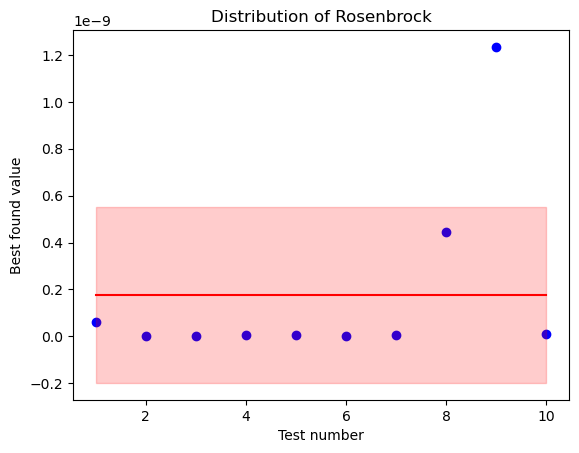

Dispersion is 1.4118253443118945e-19


In [26]:
# Optimize Rosenbrock function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(rosenbrock_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Rosenbrock")

In [27]:
def de_jong_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2.0)

Optimizing De Jong (Sphere) function
#1 Best solution: (-1.3669279042005655e-09, -9.45952649544779e-10), Best score: 0.00000, Time taken: 0.11096 seconds
#2 Best solution: (-2.0284858237573644e-09, 8.154685815497942e-10), Best score: 0.00000, Time taken: 0.07604 seconds
#3 Best solution: (-3.721073227325178e-09, 2.886849870264996e-09), Best score: 0.00000, Time taken: 0.09610 seconds
#4 Best solution: (2.7584441397721093e-09, -4.331837999416166e-09), Best score: 0.00000, Time taken: 0.11470 seconds
#5 Best solution: (8.398043149782097e-09, -7.281073521880899e-09), Best score: 0.00000, Time taken: 0.09021 seconds
#6 Best solution: (1.0388784943415885e-08, -7.565427395661573e-09), Best score: 0.00000, Time taken: 0.08197 seconds
#7 Best solution: (-3.420126404307666e-10, -2.0719390647627733e-09), Best score: 0.00000, Time taken: 0.08107 seconds
#8 Best solution: (2.9632332143592066e-09, -3.475015830645134e-10), Best score: 0.00000, Time taken: 0.10188 seconds
#9 Best solution: (1.2057230

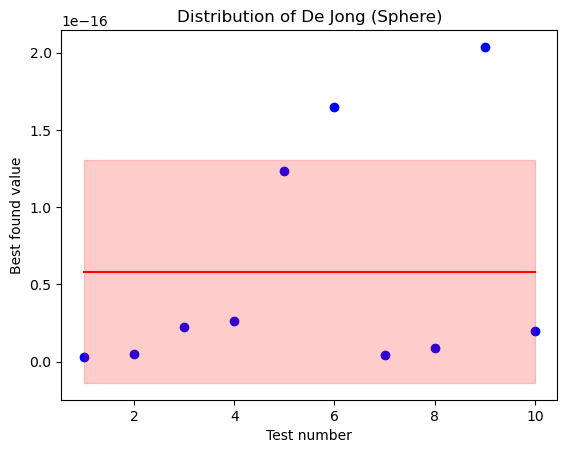

Dispersion is 5.1918285313150975e-33


In [28]:
# Optimize De Jong (Sphere) function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(de_jong_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "De Jong (Sphere)")

In [29]:
def schwefel_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    x = np.clip(x, -500.0, 500.0)
    return np.sum(x * np.sin(np.sqrt(np.abs(x))))

Optimizing Schwefel function
#1 Best solution: (-421.2265930175781, -422.2976379394531), Best score: -837.73450, Time taken: 0.48256 seconds
#2 Best solution: (-420.9130554199219, -420.9875183105469), Best score: -837.96533, Time taken: 0.27956 seconds
#3 Best solution: (-420.953125, -420.9687805175781), Best score: -837.96582, Time taken: 0.31364 seconds
#4 Best solution: (-420.9816589355469, -420.96539306640625), Best score: -837.96582, Time taken: 0.32163 seconds
#5 Best solution: (-420.96343994140625, -420.9752502441406), Best score: -837.96582, Time taken: 0.29360 seconds
#6 Best solution: (-420.972412109375, -420.9698486328125), Best score: -837.96582, Time taken: 0.24836 seconds
#7 Best solution: (-420.96282958984375, -420.9989318847656), Best score: -837.96570, Time taken: 0.19982 seconds
#8 Best solution: (-420.99700927734375, -420.9642639160156), Best score: -837.96570, Time taken: 0.30193 seconds
#9 Best solution: (-420.9649353027344, -420.9538269042969), Best score: -837.96

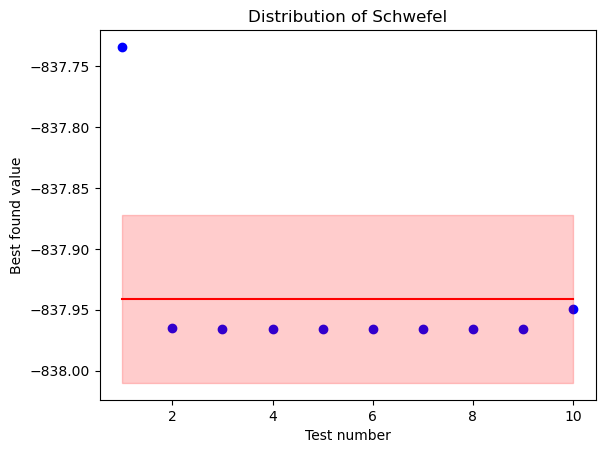

Dispersion is 0.004760633744299411


In [30]:
# Optimize Schwefel function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -500.0
bounds[0][1] = 500.0
bounds[1][0] = -500.0
bounds[1][1] = 500.0
callback_pointer = function_type(schwefel_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Schwefel")

In [31]:
def sum_of_different_powers_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(np.abs(x)**(np.arange(len(x)) + 1.0))

Optimizing Sum of Different Powers function
#1 Best solution: (-4.97882290950713e-12, -9.66701236393419e-07), Best score: 0.00000, Time taken: 0.17144 seconds
#2 Best solution: (1.2638778912332782e-11, 2.4952314561232924e-06), Best score: 0.00000, Time taken: 0.18443 seconds
#3 Best solution: (6.80115685991467e-12, -6.637024853262119e-06), Best score: 0.00000, Time taken: 0.14742 seconds
#4 Best solution: (6.314865297341044e-11, -7.409303179883864e-07), Best score: 0.00000, Time taken: 0.10091 seconds
#5 Best solution: (-3.99422162011831e-12, -1.997275830945e-06), Best score: 0.00000, Time taken: 0.12523 seconds
#6 Best solution: (-1.1904394137118857e-11, 1.6228968888754025e-06), Best score: 0.00000, Time taken: 0.12888 seconds
#7 Best solution: (4.876363202122036e-12, 3.7092340789968148e-06), Best score: 0.00000, Time taken: 0.11026 seconds
#8 Best solution: (-8.378747695658717e-11, 2.9709553928114474e-08), Best score: 0.00000, Time taken: 0.12277 seconds
#9 Best solution: (-5.1440518

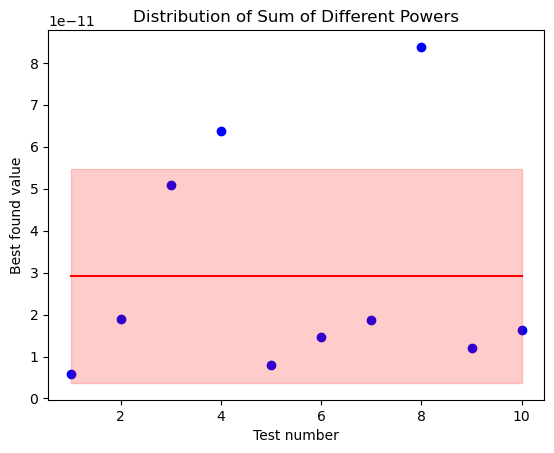

Dispersion is 6.527523044626493e-22


In [32]:
# Optimize Sum of Different Powers function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(sum_of_different_powers_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Sum of Different Powers")

In [33]:
def booth_function(x):
    return (x[0] + 2.0*x[1] - 7.0)**2.0 + (2.0*x[0] + x[1] - 5.0)**2.0

Optimizing Booth function
#1 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.01766 seconds
#2 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.01164 seconds
#3 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00894 seconds
#4 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.01010 seconds
#5 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00931 seconds
#6 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00914 seconds
#7 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00905 seconds
#8 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00948 seconds
#9 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00943 seconds
#10 Best solution: (1.0, 3.0), Best score: 0.00000, Time taken: 0.00891 seconds


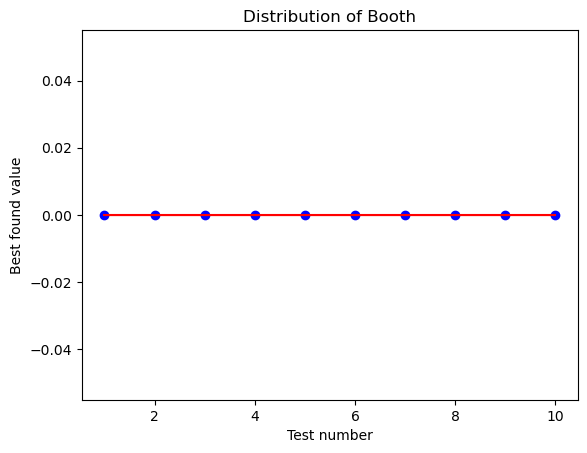

Dispersion is 0.0


In [34]:
# Optimize Booth function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(booth_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Booth")

In [35]:
def beale_function(x):
    return (1.5 - x[0] + x[0]*x[1])**2.0 + (2.25 - x[0] + x[0]*x[1]**2.0)**2.0 + (2.625 - x[0] + x[0]*x[1]**3.0)**2.0

Optimizing Beale function
#1 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.02112 seconds
#2 Best solution: (2.9999992847442627, 0.4999997615814209), Best score: 0.00000, Time taken: 0.01524 seconds
#3 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.01390 seconds
#4 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.01170 seconds
#5 Best solution: (3.0000007152557373, 0.5000001788139343), Best score: 0.00000, Time taken: 0.01037 seconds
#6 Best solution: (3.000000238418579, 0.5000000596046448), Best score: 0.00000, Time taken: 0.01036 seconds
#7 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.01013 seconds
#8 Best solution: (3.0, 0.5), Best score: 0.00000, Time taken: 0.01007 seconds
#9 Best solution: (3.0000009536743164, 0.5000001788139343), Best score: 0.00000, Time taken: 0.01087 seconds
#10 Best solution: (2.999999523162842, 0.49999985098838806), Best score: 0.00000, Time taken: 0.01168 seconds


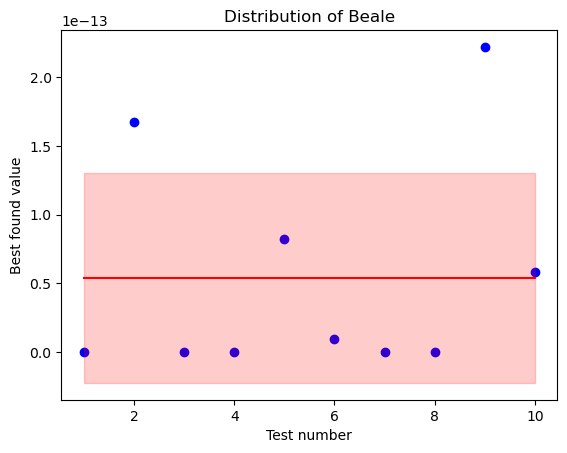

Dispersion is 5.867278679235623e-27


In [36]:
# Optimize Beale function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(beale_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Beale")

In [37]:
def goldstein_price_function(x):
    return (1.0 + (x[0] + x[1] + 1.0)**2.0 * (19.0 - 14.0*x[0] + 3.0*x[0]**2.0 - 14.0*x[1] + 6.0*x[0]*x[1] + 3.0*x[1]**2.0)) * \
           (30.0 + (2.0*x[0] - 3.0*x[1])**2.0 * (18.0 - 32.0*x[0] + 12.0*x[0]**2.0 + 48.0*x[1] - 36.0*x[0]*x[1] + 27.0*x[1]**2.0))

Optimizing Goldstein-Price function
#1 Best solution: (1.735156365612056e-05, -0.9999964237213135), Best score: 3.00000, Time taken: 0.03273 seconds
#2 Best solution: (1.1821362932096235e-05, -1.0000065565109253), Best score: 3.00000, Time taken: 0.02199 seconds
#3 Best solution: (-1.5061741578392684e-05, -1.0000001192092896), Best score: 3.00000, Time taken: 0.02102 seconds
#4 Best solution: (-1.1988922778982669e-05, -1.0000158548355103), Best score: 3.00000, Time taken: 0.02041 seconds
#5 Best solution: (1.0252988431602716e-05, -0.9999921917915344), Best score: 3.00000, Time taken: 0.01611 seconds
#6 Best solution: (1.3501878129318357e-05, -0.9999949336051941), Best score: 3.00000, Time taken: 0.01448 seconds
#7 Best solution: (-1.3556622434407473e-05, -1.0000033378601074), Best score: 3.00000, Time taken: 0.01442 seconds
#8 Best solution: (-4.32042361353524e-06, -1.0000096559524536), Best score: 3.00000, Time taken: 0.01427 seconds
#9 Best solution: (1.4915720385033637e-05, -0.99998

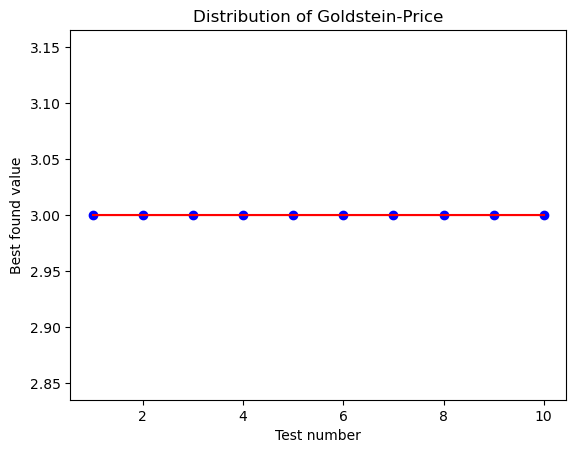

Dispersion is 0.0


In [38]:
# Optimize Goldstein-Price function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(goldstein_price_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Goldstein-Price")

In [39]:
def zakharov_function(x_ptr):
    x = np.ctypeslib.as_array(x_ptr, shape=(MAX_DIMENSIONS,))
    return np.sum(x**2) + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**2 + (np.sum(0.5 * np.arange(1, len(x) + 1) * x))**4

Optimizing Zakharov function
#1 Best solution: (2.5684183668772675e-09, -2.6833006927518e-09), Best score: 0.00000, Time taken: 0.25531 seconds
#2 Best solution: (-4.4207659755102213e-10, 3.008127080761369e-10), Best score: 0.00000, Time taken: 0.24174 seconds
#3 Best solution: (1.73977987572016e-08, 2.8808528895751806e-09), Best score: 0.00000, Time taken: 0.23351 seconds
#4 Best solution: (2.6694291221929234e-09, -3.5426384048520276e-09), Best score: 0.00000, Time taken: 0.22892 seconds
#5 Best solution: (-3.5811460463719413e-09, 5.478336007058715e-09), Best score: 0.00000, Time taken: 0.39855 seconds
#6 Best solution: (-7.282920932993875e-09, -9.175124660032452e-09), Best score: 0.00000, Time taken: 0.29225 seconds
#7 Best solution: (1.0305114983566455e-08, -3.323384234477089e-09), Best score: 0.00000, Time taken: 0.24517 seconds
#8 Best solution: (-3.1101787811849135e-10, -2.4501503048668383e-09), Best score: 0.00000, Time taken: 0.30752 seconds
#9 Best solution: (-4.91811391611918

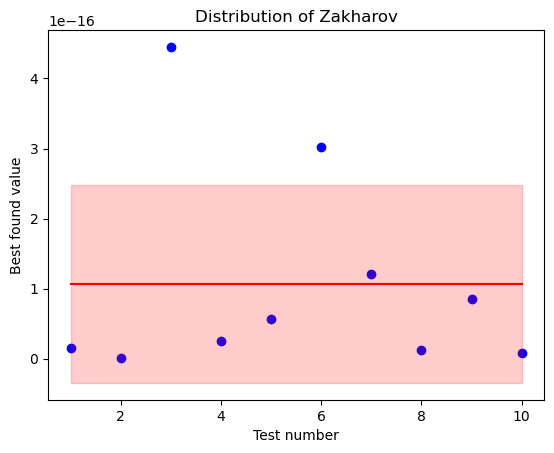

Dispersion is 2.0062292203918844e-32


In [40]:
# Optimize Zakharov function
bounds = (ctypes.c_float * 2) * MAX_DIMENSIONS
bounds = bounds()
bounds[0][0] = -5.0
bounds[0][1] = 5.0
bounds[1][0] = -5.0
bounds[1][1] = 5.0
callback_pointer = function_type(zakharov_function)
testing(callback_pointer, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "Zakharov")

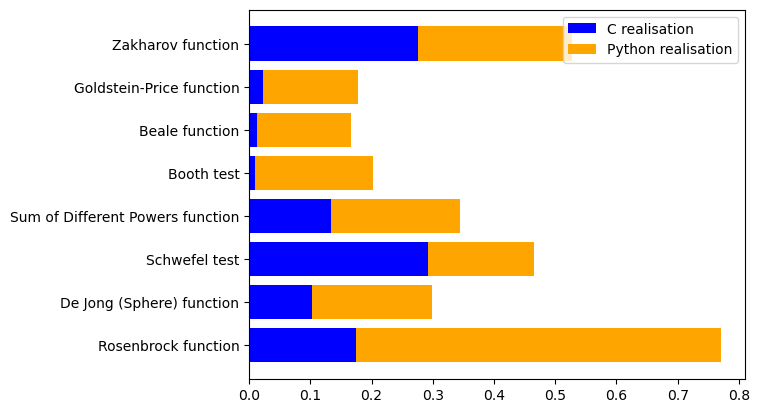

In [41]:
times = np.array(times)
ax1 = plt.subplot()
ax1.set_yticks([1, 2, 3, 4, 5, 6, 7, 8])
ax1.set_yticklabels(["Rosenbrock function",
"De Jong (Sphere) function",
"Schwefel test",
"Sum of Different Powers function",
"Booth test",
"Beale function",
"Goldstein-Price function",
"Zakharov function"])
ax1.barh([1, 2, 3, 4, 5, 6, 7, 8], times, color="blue", label="C realisation")
ax1.barh([1, 2, 3, 4, 5, 6, 7, 8], times_py, left=times, color="orange", label="Python realisation")
plt.legend(loc="upper right")

plt.show()

# Тестирование на многомерных функциях и сравнение с реализацией без использования Numba

In [42]:
def draw_comparsion_graphic(best_values_original, best_values_numba, iterations_number, function_name):
    x = np.array([i for i in range(1, iterations_number + 1)])
    plt.title("Performance of " + function_name)
    plt.xlabel("Iteration number")
    plt.ylabel("Functional value")
    plt.plot(x, best_values_original, color="blue", label="Original")
    plt.plot(x, best_values_numba, color="red", label="with Numba")
    plt.grid(color="green", linestyle="--", linewidth=0.5)
    plt.legend(loc="upper right")
    plt.show()

In [43]:
def find_best_values(func, bounds, n_dims, pop_size, max_iter, f, cr, func_name):
    print(f"Optimizing {func_name} function")
    best_values = []
    time_average = 0.0
    for i in range(TESTS_AMOUNT):
        start_time = time.perf_counter()
        best_solution, best_score, _ = de_optimizer_(func, bounds, 50, MAX_ITER, 0.8, 0.9)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_average += elapsed_time
        print(
            f"#{i + 1} Best solution: {best_solution}, Best score: {best_score:.5f}, Time taken: {elapsed_time:.5f} seconds")
        best_values.append(best_score)
    return best_values

### Реализация без использования Numba

In [44]:
def rand_1_bin_(population, F, CR):
    """
    rand/1/bin DE variant
    """
    n = population.shape[0]
    D = population.shape[1]
    v = np.zeros((n, D))
    for i in range(n):
        # Select three different individuals at random
        idxs = np.random.choice(n, 3, replace=False)
        a, b, c = population[idxs]
        # Generate mutant vector
        mutant = a + F*(b - c)
        # Generate trial vector
        jrand = np.random.randint(D)
        trial = np.zeros(D)
        # Select trial vector between mutant or just from population
        for j in range(D):
            if np.random.rand() < CR or j == jrand:
                trial[j] = mutant[j]
            else:
                trial[j] = population[i, j]
        v[i] = trial
    return v

def de_optimizer_(objective_function, bounds, pop_size=50, max_iter=1000, F=0.8, CR=0.9):
    """
    Differential Evolution optimizer
    """
    n_dims = len(bounds)
    # Initialize population
    population = np.zeros((pop_size, n_dims))
    for i in range(pop_size):
        for j in range(n_dims):
            population[i, j] = bounds[j, 0] + np.random.rand()*(bounds[j, 1] - bounds[j, 0])
    # Evaluate initial population
    scores = np.zeros(pop_size)
    for i in range(pop_size):
        scores[i] = objective_function(population[i])
    # Find best individual in initial population
    best_idx = np.argmin(scores)
    best = population[best_idx]

    # Initialize performance graph data
    performance = []

    # Main loop
    for i in range(max_iter):
        # Generate new population
        v = rand_1_bin_(population, F, CR)
        # Evaluate new population
        new_scores = np.zeros(pop_size)
        for j in range(pop_size):
            new_scores[j] = objective_function(v[j])
        # Replace old population with new population if better
        for j in range(pop_size):
            if new_scores[j] < scores[j]:
                population[j] = v[j]
                scores[j] = new_scores[j]
        # Update best individual
        new_best_idx = np.argmin(scores)
        if scores[new_best_idx] < scores[best_idx]:
            best_idx = new_best_idx
            best = population[best_idx]

        # Record the best score in this iteration for performance graph
        performance.append(scores[best_idx])

    return best, scores[best_idx], performance

## Многомерная функция

In [45]:
@jit(nopython=True)
def a_lot_dimensions(arguments):
    return sum([arguments[i] ** 2 for i in range(256)])

In [46]:
def a_lot_dimensions_(arguments):
    return sum([arguments[i] ** 2 for i in range(256)])

Optimizing A lot of dimensions with Numba function
#1 Best solution: [ 3.29175727  0.43475661 -1.44199624 -4.50646719 -0.09599805 -0.13002086
  0.57721899  3.0795216   0.06288489  2.68781147  4.49982992  1.82891317
  0.23991224  4.14590779 -1.93908643  0.44330143 -3.26152156 -4.78335137
 -4.40933502 -3.7067279   0.90387316 -1.88002321  3.54310878 -3.4332531
 -2.11935031 -2.33411336 -0.98107469 -2.2062499   0.59378677 -0.09771984
 -3.31386032  0.36117437  1.51361703  1.94039256 -1.98895881  3.99710937
  2.32484914  0.69474125  3.77051265  2.92329129 -0.1049857  -4.41231249
  4.26587879 -0.81061903 -1.35613663  4.34320043  3.04378937  1.56451692
  2.39610974 -2.51500704  4.74653613 -0.72544343  0.19071825  1.26043668
  3.3547198  -3.09123139 -3.05765566 -1.88604407 -2.82147219  0.3155275
  2.16491641  1.53435565 -1.9913939   0.61763366 -4.91946703 -1.42058293
  3.24390924 -1.22007093 -3.95855821 -0.81846846 -2.93558912  0.11600641
 -2.8511402   2.54704783  0.12327066 -1.66671545  0.23053

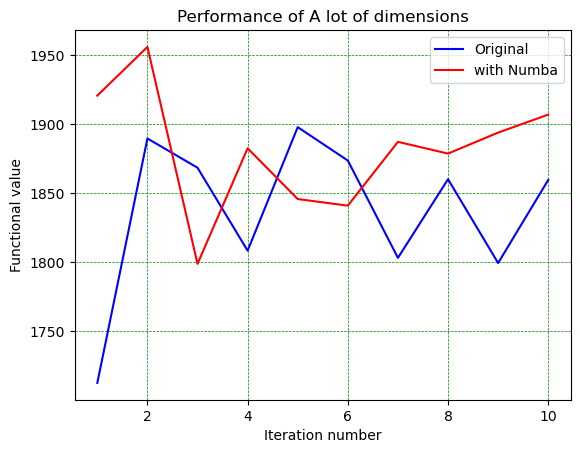

In [47]:
bounds = np.array([[-5, 5]] * 256)
best_values_numba = find_best_values(a_lot_dimensions, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "A lot of dimensions with Numba")
best_values_nonumba = find_best_values(a_lot_dimensions_, bounds, 2, 50, MAX_ITER, 0.8, 0.9, "A lot of dimensions without Numba")
draw_comparsion_graphic(best_values_numba, best_values_nonumba, TESTS_AMOUNT, "A lot of dimensions")